In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# 1. Load dataset

In [2]:
def load_dataset(
    file_path: str = r"..\data\synthetized_dataset.csv"
) -> pd.DataFrame:
    # --- Load dataset ---
    output = pd.read_csv(
        file_path,
        parse_dates = ['date'],
        index_col=['date']
    )

    # --- Change date format ---
    output.index = pd.to_datetime(
        output.index, 
        format='%d/%m/%Y', 
        errors='coerce'
    )

    return output   

In [3]:
dataset = load_dataset()
dataset.head()

,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume
date,,,,,,,,,,,,
2020-01-01,NaN,NaN,23171.0,1517.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,23175.5,1531.30,NaN,NaN,NaN,NaN,NaN,NaN,21.39,896720.0
2020-01-03,NaN,NaN,23174.5,1553.45,NaN,NaN,NaN,NaN,NaN,NaN,21.03,2047880.0
2020-01-06,NaN,NaN,23178.0,1582.69,NaN,NaN,NaN,NaN,NaN,NaN,20.81,1091660.0
2020-01-07,NaN,NaN,23179.0,1577.38,NaN,NaN,NaN,NaN,NaN,NaN,21.21,837240.0


# 2. General Description

In [4]:
def investigate_dataset_description(
    _df: pd.DataFrame = dataset
) -> None:
    df = _df.copy()

    print('======================================================')
    print('KẾT QUẢ ĐIỀU TRA DATASET')
    print('======================================================')
    _columns = list(df.columns)
    print(f'Tổng số cột là: {len(_columns)}')
    print(f'Tổng số mẫu là: {len(df)}')
    print()
    print(df.info())
    print()
    print(df.describe())

investigate_dataset_description(dataset)

KẾT QUẢ ĐIỀU TRA DATASET
Tổng số cột là: 12
Tổng số mẫu là: 1529

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1529 entries, 2020-01-01 to 2025-09-30
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cpi_rate              68 non-null     float64
 1   gdp_value             5 non-null      float64
 2   usd_vnd_rate          1501 non-null   float64
 3   xau_usd_rate          1495 non-null   float64
 4   market_cap            19 non-null     float64
 5   pe_ratio              19 non-null     float64
 6   fpt_net_revenue       22 non-null     float64
 7   fpt_gross_profit      22 non-null     float64
 8   fpt_operating_profit  22 non-null     float64
 9   fpt_net_profit        22 non-null     float64
 10  fpt_stock_price       1433 non-null   float64
 11  fpt_stock_volume      1433 non-null   float64
dtypes: float64(12)
memory usage: 155.3 KB
None

        cpi_rate     gdp_value  usd_vnd_rate  

# 3. Phân tích đơn biến

## 3.0. Các hàm dùng lại


----- THỐNG KÊ GIÁ TRỊ MISSING cpi_rate -----
Tổng số giá trị khả dụng   : 68
Tổng số giá trị rỗng       : 1461
Tỉ lệ giá trị rỗng         : 95.55%

----- CHỈ SỐ THỐNG KÊ CHO CỘT cpi_rate -----
Giá trị trung bình         : 0.03051
Giá trị nhỏ nhất           : -0.0097
Q1 (25th percentile)       : 0.0246
Q2 (Trung vị)              : 0.0305
Q3 (75th percentile)       : 0.036
Giá trị lớn nhất           : 0.0643
IQR                        : 0.0114


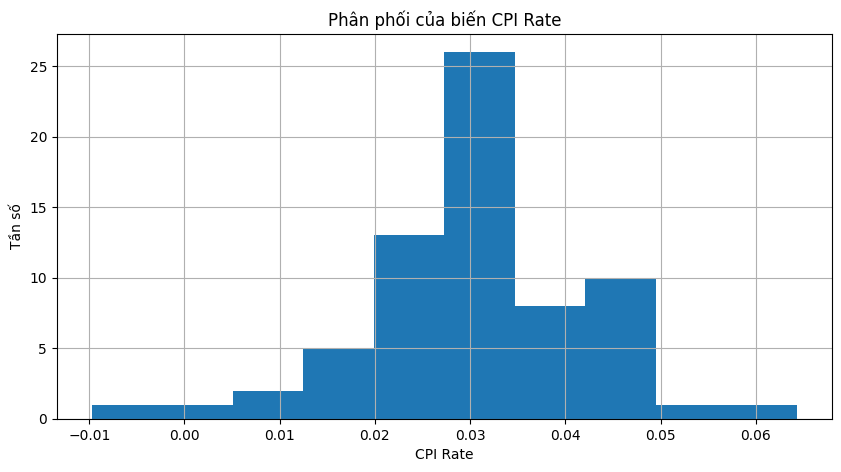

In [5]:
def investigate_variable(
    dataset,
    column_name,
):
    column = dataset[column_name]

    print(f'\n----- THỐNG KÊ GIÁ TRỊ MISSING {column_name} -----')
    num_of_missing = dataset[column_name].isnull().sum()
    num_of_value   = len(dataset[column_name])

    print(f'Tổng số giá trị khả dụng   : {num_of_value - num_of_missing}')
    print(f'Tổng số giá trị rỗng       : {num_of_missing}')
    print(f'Tỉ lệ giá trị rỗng         : {round(num_of_missing/num_of_value*100, 2)}%')

    # --- Statistics ---
    MEAN = dataset[column_name].mean()
    MIN = dataset[column_name].min()
    Q1 = dataset[column_name].quantile(0.25)
    Q2 = dataset[column_name].quantile(0.5)
    Q3 = dataset[column_name].quantile(0.75)
    MAX = dataset[column_name].max()
    IQR = Q3 - Q1

    print(f'\n----- CHỈ SỐ THỐNG KÊ CHO CỘT {column_name} -----')
    print(f'Giá trị trung bình         : {round(MEAN, 5)}')

    print(f'Giá trị nhỏ nhất           : {round(MIN, 5)}')
    print(f'Q1 (25th percentile)       : {round(Q1, 5)}')
    print(f'Q2 (Trung vị)              : {round(Q2, 5)}')
    print(f'Q3 (75th percentile)       : {round(Q3, 5)}')
    print(f'Giá trị lớn nhất           : {round(MAX, 5)}')
    print(f'IQR                        : {round(IQR, 5)}')

investigate_variable(
    dataset,
    'cpi_rate'
)

dataset['cpi_rate'].hist(figsize=(10, 5))
plt.title('Phân phối của biến CPI Rate')
plt.xlabel('CPI Rate')
plt.ylabel('Tần số')
plt.show()

In [6]:
def decompose_time_series(
    dataset,
    column_name,
    date_name='date',
    period=12,
    model='additive',
    freq='M'
):
    """
    Phân tích cấu trúc chuỗi thời gian phổ quát, hỗ trợ tần suất khác nhau (D, W, M, Q).
    
    Tham số:
    - freq (str): Tần suất chuẩn hóa (ví dụ: 'D', 'W', 'M', 'Q').
    - period (int): Chu kỳ của tính mùa vụ (ví dụ: 7 cho W, 12 cho M, 4 cho Q).
    """
    
    print(f"\n----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: {column_name} (Freq: {freq}) -----")
    
    # --- Chuẩn bị dữ liệu ---
    try:
        df_ts = dataset.set_index(date_name).copy()
    except KeyError:
        print(f"LỖI: DataFrame không có cột '{date_name}'. Hãy kiểm tra tên cột ngày tháng.")
        return None

    # --- Trích xuất Series ---
    series = df_ts[column_name]
    
    if series.empty:
        print("LỖI: Series trống.")
        return None
        
    # --- Chuẩn hóa + xử lý missing value
    try:
        series_freq = series.asfreq(freq)
    except Exception as e:
        print(f"LỖI: Không thể chuyển đổi sang tần suất '{freq}'. Lỗi: {e}")
        return None
        
    # --- Nội suy Linear (nếu còn chỗ trống) ---
    series_final = series_freq.interpolate(method='linear').bfill().dropna()

    if len(series_final) < period * 2:
        print(f"LỖI: Chuỗi quá ngắn ({len(series_final)} điểm). Cần ít nhất 2 chu kỳ ({period*2} điểm) cho phân tích.")
        return None
    
    # --- Thực hiện phân rã và trực quan hóa ---
    try:
        decomposition = seasonal_decompose(
            series_final,
            model=model,
            period=period
        )
        
        fig, axes = plt.subplots(
            nrows=4, 
            ncols=1, 
            figsize=(10, 8),  
            sharex=True   
        )
        decomposition.observed.plot(ax=axes[0], title='Observed',grid=True)
        decomposition.trend.plot(ax=axes[1], title='Trend',grid=True)
        decomposition.seasonal.plot(ax=axes[2], title='Seasonal',grid=True)
        decomposition.resid.plot(ax=axes[3], title='Residual',grid=True)
        
        fig.suptitle(f'Decomposition của {column_name} (Model: {model})', y=1.02)
        fig.tight_layout() 
        plt.show()
        return decomposition
        
    except ValueError as e:
        print(f"LỖI PHÂN TÍCH: {e}")
        print("Gợi ý: Hãy kiểm tra lại tham số 'period'. Chu kỳ phải lớn hơn 1 và nhỏ hơn số lượng quan sát.")
        return None

In [7]:
def check_stationarity(series, alpha=0.05, title='Chuỗi thời gian'):
    """
    Thực hiện kiểm định Augmented Dickey-Fuller (ADF) và trực quan hóa chuỗi.
    
    Tham số:
    - series (pd.Series): Chuỗi thời gian (cần có DatetimeIndex).
    - alpha (float): Mức ý nghĩa (mặc định 0.05, tương đương 5%).
    - title (str): Tiêu đề cho biểu đồ.
    """
    
    print(f"\n----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: {title} -----")
    
    # --- Thực hiện Kiểm định ADF ---
    result = adfuller(series, autolag='AIC', regression='ct') 
    
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # --- In kết quả ---
    print(f"Chỉ số ADF (ADF Statistic)      : {adf_statistic:.4f}")
    print(f"Giá trị p (P-value)             : {p_value:.6f}")
    print(f"Ngưỡng ý nghĩa (Critical Value) :")
    for key, value in critical_values.items():
        print(f"  {key}: {value:.4f}")
    
    # --- Kết luận ---
    is_stationary = p_value < alpha
    print("-" * 50)
    if is_stationary:
        print(f"KẾT LUẬN: Chuỗi CÓ TÍNH DỪNG (P-value < {alpha}). Bác bỏ H0.")
    else:
        print(f"KẾT LUẬN: Chuỗi KHÔNG CÓ TÍNH DỪNG (P-value >= {alpha}). Chấp nhận H0.")
    print("-" * 50)

    # --- Trực quan hóa --- 
    plt.figure(figsize=(10, 4))
    plt.plot(series, label='Dữ liệu Gốc', color='blue')
    plt.title(f'{title} (Stationary: {is_stationary})')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá trị')
    plt.grid(True)
    plt.legend()
    plt.show()

    return is_stationary, p_value

In [8]:
def log_differencing(
    series: pd.Series,
    periods: int = 1
) -> pd.Series:
    """
    Tính toán sai phân logarit (Log Differencing), hay lợi nhuận logarit.

    Công thức: Delta_ln(Y_t) = ln(Y_t) - ln(Y_{t-k})

    Args:
        series (pd.Series): Chuỗi dữ liệu chuỗi thời gian đầu vào (ví dụ: tỷ giá, giá vàng).
        periods (int): Khoảng thời gian để lấy sai phân (mặc định là 1).

    Returns:
        pd.Series: Chuỗi dữ liệu đã lấy sai phân log.
    """
    log_series = np.log(series)
    diff_log_series = log_series.diff(periods=periods)
    diff_log_series.name = f"log_return_{series.name}"
    
    return diff_log_series

## 3.1. Biến `cpi_rate`

> Chỉ số CPI (Consumer Price Index) là một chỉ báo kinh tế đo lường sự thay đổi giá trung bình của một "giỏ" các hàng hóa và dịch vụ thiết yếu mà người dân thường dùng (như thực phẩm, y tế, giáo dục, nhà ở) theo thời gian, phản ánh chính xác mức độ lạm phát hay giảm phát của nền kinh tế.

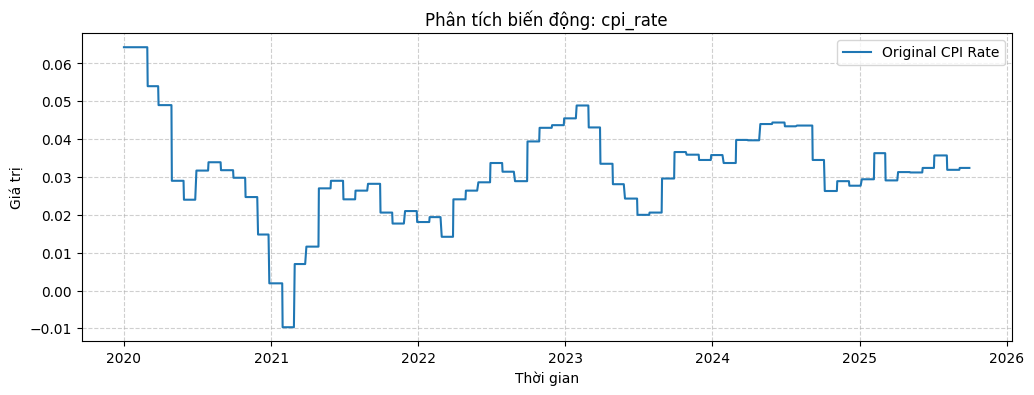


--- Đang tiến hành phân rã chuỗi cpi_rate (Additive Model) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: cpi_rate (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.
Lỗi: Không thể thực hiện phân rã.


,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume
date,,,,,,,,,,,,
2020-01-01,0.0643,NaN,23171.0,1517.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.0643,NaN,23175.5,1531.30,NaN,NaN,NaN,NaN,NaN,NaN,21.39,896720.0
2020-01-03,0.0643,NaN,23174.5,1553.45,NaN,NaN,NaN,NaN,NaN,NaN,21.03,2047880.0
2020-01-06,0.0643,NaN,23178.0,1582.69,NaN,NaN,NaN,NaN,NaN,NaN,20.81,1091660.0
2020-01-07,0.0643,NaN,23179.0,1577.38,NaN,NaN,NaN,NaN,NaN,NaN,21.21,837240.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,0.0324,NaN,26432.0,3779.54,NaN,NaN,NaN,NaN,NaN,NaN,99.50,7421100.0
2025-09-25,0.0324,NaN,26428.0,3761.66,NaN,NaN,NaN,NaN,NaN,NaN,98.00,8627700.0
2025-09-26,0.0324,NaN,26422.5,3783.88,NaN,NaN,NaN,NaN,NaN,NaN,97.50,8080800.0


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def EDA_cpi(df_input: pd.DataFrame, column_name: str = 'cpi_rate') -> pd.DataFrame:
    df = df_input.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='Original CPI Rate', color='#1f77b4', lw=1.5)
    plt.title(f"Phân tích biến động: {column_name}", fontsize=12)
    plt.xlabel("Thời gian")
    plt.ylabel("Giá trị")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print(f"\n--- Đang tiến hành phân rã chuỗi {column_name} (Additive Model) ---")
    decomposed = decompose_time_series(
        df,
        column_name,
        date_name=None, # Truyền None hoặc để hàm tự nhận diện Index
        period=12,
        model='additive',
        freq='M'
    )
    
    if decomposed is None:
        print("Lỗi: Không thể thực hiện phân rã.")
        return df

    print("\n[Kiểm định] Tính dừng của thành phần Residuals:")
    is_stationary, p_value = check_stationarity(
        decomposed.resid.dropna(), 
        title='Residuals component'
    )

    cpi_sa = decomposed.trend.dropna() + decomposed.resid.dropna()
    print("\n[Kiểm định] Tính dừng của chuỗi Seasonally Adjusted (Trend + Resid):")
    check_stationarity(cpi_sa, title='Seasonally Adjusted CPI')

    final_col = column_name

    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[final_col]])
    df[f"{final_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\n>>> Hoàn tất! Cột dữ liệu sẵn sàng: {final_col}_scaled")
    return df

EDA_cpi(df_input=dataset)

## 3.2. Giá trị GDP

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [49]:
dataset.columns

Index(['cpi_rate', 'gdp_value', 'usd_vnd_rate', 'xau_usd_rate', 'market_cap',
       'pe_ratio', 'fpt_net_revenue', 'fpt_gross_profit',
       'fpt_operating_profit', 'fpt_net_profit', 'fpt_stock_price',
       'fpt_stock_volume'],
      dtype='object')

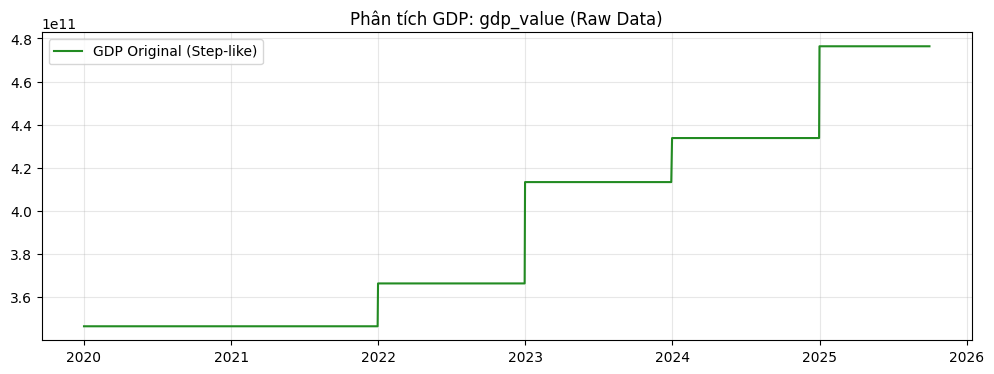


--- Đang phân rã chuỗi gdp_value ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: gdp_value (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.

--- Biến đổi dữ liệu: Tính toán Tốc độ tăng trưởng (Log-Return) ---

[Kiểm định] Tính dừng của gdp_value_growth:

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: GDP Growth Rate -----
Chỉ số ADF (ADF Statistic)      : -39.1570
Giá trị p (P-value)             : 0.000000
Ngưỡng ý nghĩa (Critical Value) :
  1%: -3.9647
  5%: -3.4134
  10%: -3.1287
--------------------------------------------------
KẾT LUẬN: Chuỗi CÓ TÍNH DỪNG (P-value < 0.05). Bác bỏ H0.
--------------------------------------------------


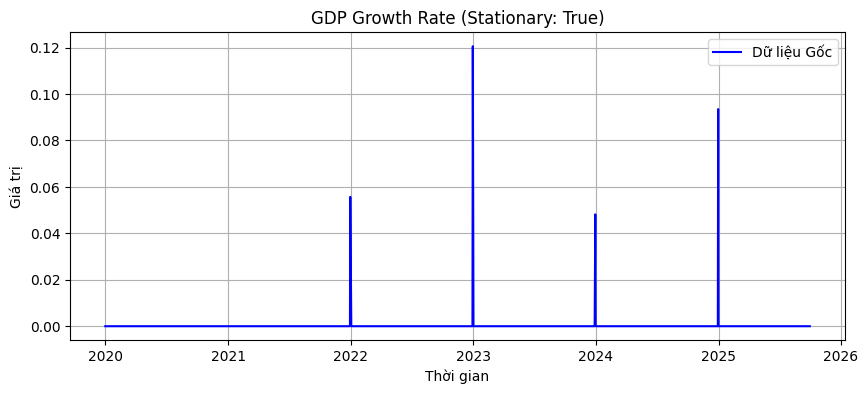

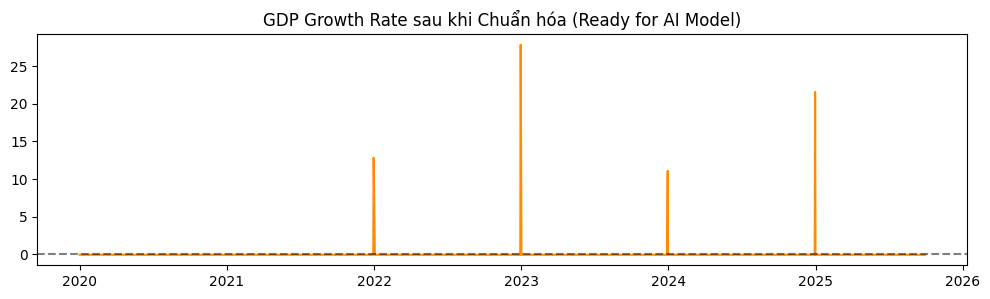


>>> Hoàn tất EDA GDP. Cột mục tiêu: gdp_value_growth_scaled


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def EDA_gdp(df_input: pd.DataFrame, column_name: str = 'gdp_value') -> pd.DataFrame:
    """
    Phân tích EDA cho GDP. 
    Đặc điểm GDP: Thường không dừng, có xu hướng mạnh và tính mùa vụ theo quý.
    """
    df = df_input.copy()
    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='GDP Original (Step-like)', color='forestgreen')
    plt.title(f"Phân tích GDP: {column_name} (Raw Data)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print(f"\n--- Đang phân rã chuỗi {column_name} ---")
    decomposed = decompose_time_series(
        df,
        column_name,
        date_name=None, 
        period=12, 
        model='multiplicative',
        freq='M'
    )

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (GDP):")
        is_stationary, _ = check_stationarity(decomposed.resid.dropna(), title='GDP Residuals')

    print('\n--- Biến đổi dữ liệu: Tính toán Tốc độ tăng trưởng (Log-Return) ---')
    new_col = f'{column_name}_growth'
    df[new_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[new_col] = df[new_col].ffill().bfill()

    print(f"\n[Kiểm định] Tính dừng của {new_col}:")
    check_stationarity(df[new_col], title='GDP Growth Rate')

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[[new_col]])
    df[f"{new_col}_scaled"] = pd.Series(scaled_data.flatten(), index=df.index)

    plt.figure(figsize=(12, 3))
    plt.plot(df.index, df[f"{new_col}_scaled"], color='darkorange')
    plt.title(f"GDP Growth Rate sau khi Chuẩn hóa (Ready for AI Model)")
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.show()

    print(f"\n>>> Hoàn tất EDA GDP. Cột mục tiêu: {new_col}_scaled")
    return df

dataset_final = EDA_gdp(dataset)

## 3.3. Tỉ giá `usd_vnd_rate`

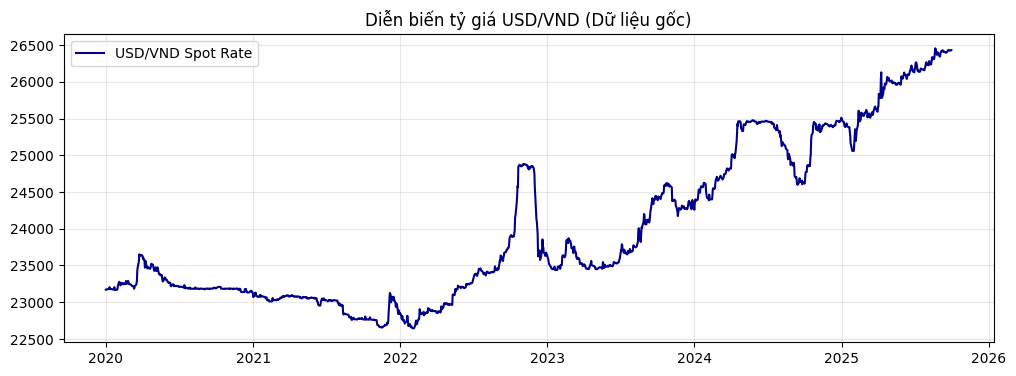


--- Biến đổi dữ liệu: Tính toán Log Returns ---


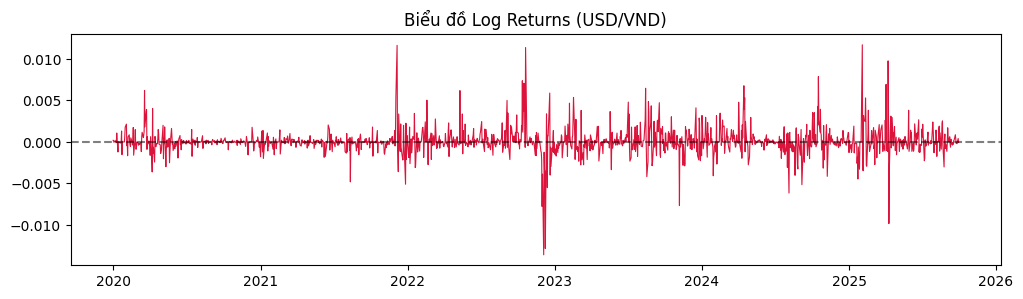


--- Đang phân rã chuỗi usd_vnd_log_return ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: usd_vnd_log_return (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.

--- Chuẩn hóa dữ liệu (StandardScaler) ---

>>> Hoàn tất EDA USD/VND. Cột sẵn sàng: usd_vnd_log_return_scaled


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def EDA_usd_vnd(df_input: pd.DataFrame, column_name: str = 'usd_vnd_rate') -> pd.DataFrame:
    """
    Phân tích EDA cho tỷ giá USD/VND.
    Quy trình: Xử lý Missing -> Log Returns -> Phân rã -> Kiểm định -> Chuẩn hóa.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='USD/VND Spot Rate', color='darkblue')
    plt.title("Diễn biến tỷ giá USD/VND (Dữ liệu gốc)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print('\n--- Biến đổi dữ liệu: Tính toán Log Returns ---')
    new_column_name = 'usd_vnd_log_return'
    df[new_column_name] = np.log(df[column_name] / df[column_name].shift(1))
    df[new_column_name] = df[new_column_name].ffill().bfill()

    plt.figure(figsize=(12, 3))
    plt.plot(df.index, df[new_column_name], color='crimson', lw=0.8)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.title("Biểu đồ Log Returns (USD/VND)")
    plt.show()

    print(f"\n--- Đang phân rã chuỗi {new_column_name} ---")
    decomposed = decompose_time_series(
        df,
        new_column_name,
        date_name=None, 
        period=12, 
        model='additive',
        freq='M'
    )

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (Log Returns):")
        check_stationarity(decomposed.resid.dropna(), title='USD/VND Residuals')
        
        print("\n[Kiểm định] Tính dừng của chuỗi Seasonally Adjusted:")
        usd_sa = decomposed.trend.dropna() + decomposed.resid.dropna()
        check_stationarity(usd_sa, title='USD/VND Log Return (SA)')

    print('\n--- Chuẩn hóa dữ liệu (StandardScaler) ---')
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[[new_column_name]])
    df[f"{new_column_name}_scaled"] = pd.Series(scaled_data.flatten(), index=df.index)
    
    print(f"\n>>> Hoàn tất EDA USD/VND. Cột sẵn sàng: {new_column_name}_scaled")
    return df

# Thực thi
dataset_final = EDA_usd_vnd(dataset)

## 3.4. Biến `XAU_USD_RATE`

In [91]:
dataset.columns

Index(['cpi_rate', 'gdp_value', 'usd_vnd_rate', 'xau_usd_rate', 'market_cap',
       'pe_ratio', 'fpt_net_revenue', 'fpt_gross_profit',
       'fpt_operating_profit', 'fpt_net_profit', 'fpt_stock_price',
       'fpt_stock_volume'],
      dtype='object')

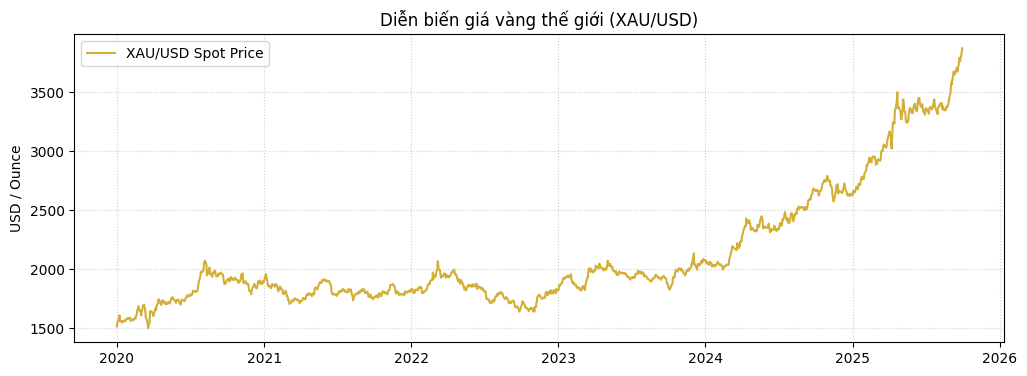


THỰC HIỆN BIẾN ĐỔI LOG RETURNS


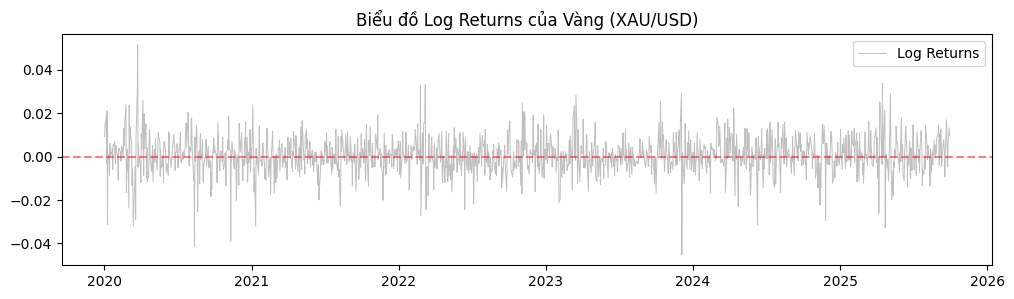


--- Phân rã thành phần chuỗi xau_usd_log_return ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: xau_usd_log_return (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.

--- Tiến hành chuẩn hóa StandardScaler ---

>>> Hoàn tất! Cột dữ liệu cuối cùng: xau_usd_log_return_scaled


In [126]:
def EDA_gold(df_input: pd.DataFrame, column_name: str = 'xau_usd_rate') -> pd.DataFrame:
    """
    Phân tích EDA chuyên sâu cho giá vàng XAU/USD.
    Quy trình: Xử lý Missing -> Log Returns -> Decomposition -> Stationarity Test -> Scaling.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='XAU/USD Spot Price', color='#d4af37') # Màu vàng gold
    plt.title("Diễn biến giá vàng thế giới (XAU/USD)", fontsize=12)
    plt.ylabel("USD / Ounce")
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('THỰC HIỆN BIẾN ĐỔI LOG RETURNS')
    print('='*30)
    new_column_name = 'xau_usd_log_return'
    df[new_column_name] = np.log(df[column_name] / df[column_name].shift(1))
    df[new_column_name] = df[new_column_name].ffill().bfill()

    plt.figure(figsize=(12, 3))
    plt.plot(df.index, df[new_column_name], color='#c0c0c0', lw=0.7, label='Log Returns')
    plt.axhline(0, color='red', linestyle='--', alpha=0.5)
    plt.title("Biểu đồ Log Returns của Vàng (XAU/USD)")
    plt.legend()
    plt.show()

    print(f"\n--- Phân rã thành phần chuỗi {new_column_name} ---")
    decomposed = decompose_time_series(
        df,
        new_column_name,
        date_name=None, 
        period=12, 
        model='additive',
        freq='M' 
    )

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của thành phần Residuals (Phần dư):")
        check_stationarity(decomposed.resid.dropna(), title='XAU/USD Residuals')
        gold_sa = decomposed.trend.dropna() + decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của XAU/USD Log Return (Seasonally Adjusted):")
        check_stationarity(gold_sa, title='XAU/USD Log Return (SA)')

    print('\n--- Tiến hành chuẩn hóa StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[new_column_name]])
    df[f"{new_column_name}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\n>>> Hoàn tất! Cột dữ liệu cuối cùng: {new_column_name}_scaled")
    return df

dataset_final = EDA_gold(dataset)

In [93]:
dataset.columns

Index(['cpi_rate', 'gdp_value', 'usd_vnd_rate', 'xau_usd_rate', 'market_cap',
       'pe_ratio', 'fpt_net_revenue', 'fpt_gross_profit',
       'fpt_operating_profit', 'fpt_net_profit', 'fpt_stock_price',
       'fpt_stock_volume'],
      dtype='object')

## 3.5. Chỉ số `market_cap`

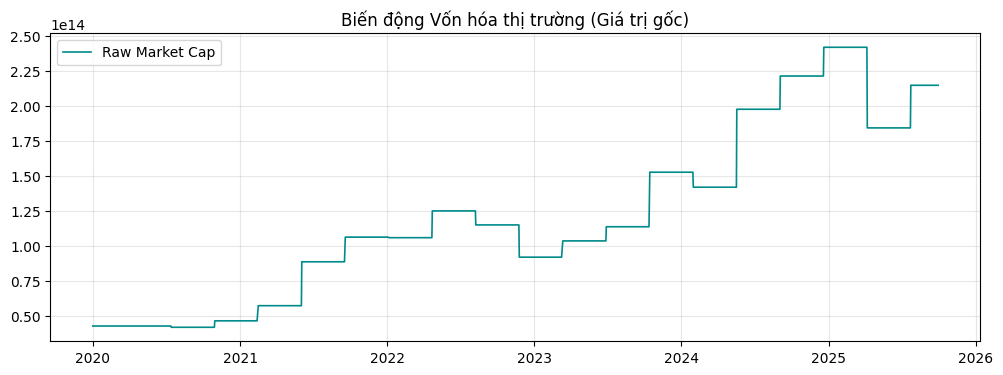


THỰC HIỆN BIẾN ĐỔI LOG RETURNS


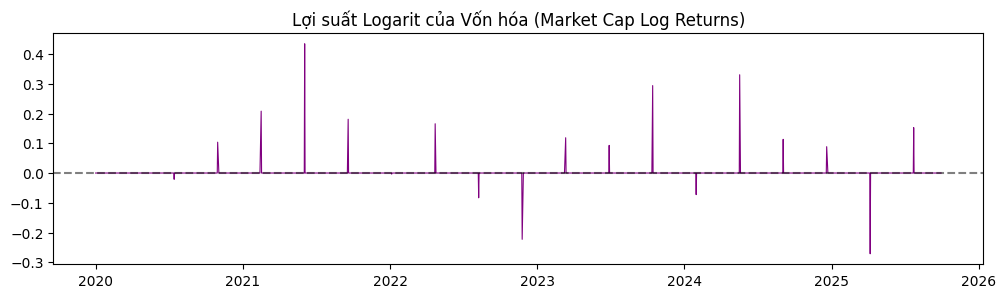


--- Phân rã thành phần chuỗi market_cap_log_return (Dữ liệu tháng) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: market_cap_log_return (Freq: ME) -----


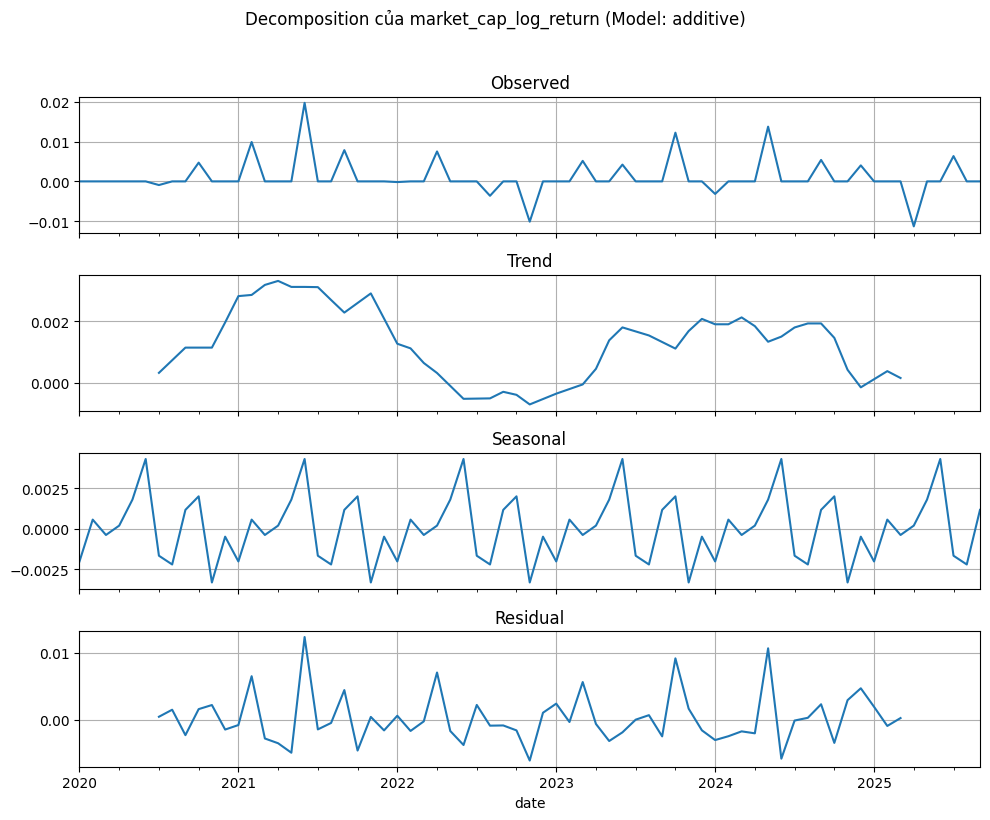


[Kiểm định] Tính dừng của Residuals (Market Cap Log Returns):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: Market Cap Residuals -----
Chỉ số ADF (ADF Statistic)      : -5.6159
Giá trị p (P-value)             : 0.000014
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1482
  5%: -3.5004
  10%: -3.1794
--------------------------------------------------
KẾT LUẬN: Chuỗi CÓ TÍNH DỪNG (P-value < 0.05). Bác bỏ H0.
--------------------------------------------------


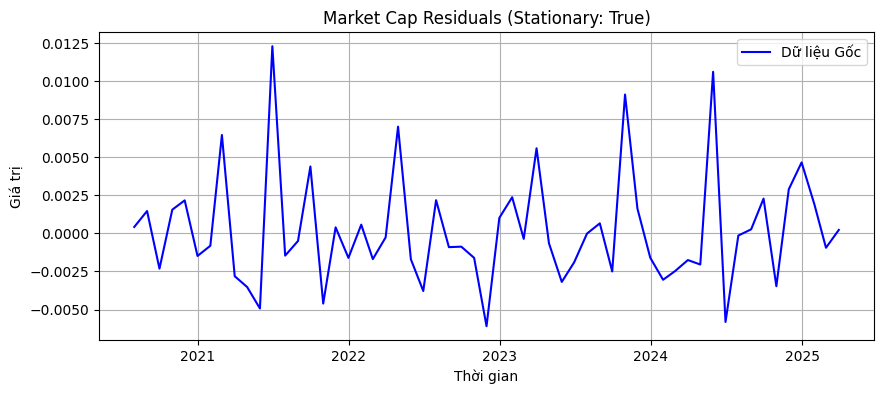


[Kiểm định] Tính dừng của Market Cap Log Return (SA):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: Market Cap Log Return (SA) -----
Chỉ số ADF (ADF Statistic)      : -8.3689
Giá trị p (P-value)             : 0.000000
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1303
  5%: -3.4920
  10%: -3.1746
--------------------------------------------------
KẾT LUẬN: Chuỗi CÓ TÍNH DỪNG (P-value < 0.05). Bác bỏ H0.
--------------------------------------------------


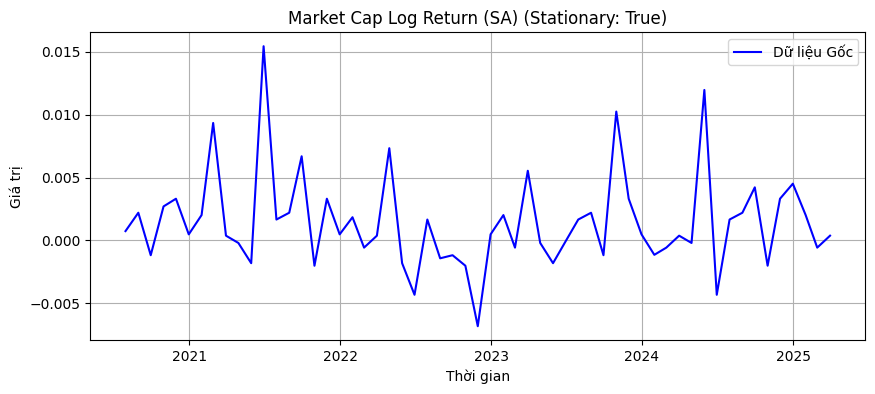


--- Chuẩn hóa StandardScaler ---

>>> Hoàn tất EDA Market Cap. Cột đầu ra: market_cap_log_return_scaled


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def EDA_market_cap(df_input: pd.DataFrame, column_name: str = 'market_cap') -> pd.DataFrame:
    """
    Phân tích EDA cho Vốn hóa thị trường (Market Cap).
    Lưu ý: Market Cap là biến số 'Stock', không nên dùng .sum() khi resample.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='Raw Market Cap', color='darkcyan', lw=1.2)
    plt.title("Biến động Vốn hóa thị trường (Giá trị gốc)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('THỰC HIỆN BIẾN ĐỔI LOG RETURNS')
    print('='*30)
    log_ret_col = f'{column_name}_log_return'
    df[log_ret_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[log_ret_col] = df[log_ret_col].ffill().bfill()

    plt.figure(figsize=(12, 3))
    plt.plot(df.index, df[log_ret_col], color='purple', lw=0.8)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.title("Lợi suất Logarit của Vốn hóa (Market Cap Log Returns)")
    plt.show()

    df_monthly = df[log_ret_col].resample('ME').mean().to_frame()
    
    print(f"\n--- Phân rã thành phần chuỗi {log_ret_col} (Dữ liệu tháng) ---")
    decomposed = decompose_time_series(
        df_monthly.reset_index(),
        log_ret_col,
        date_name='date',
        period=12,
        model='additive',
        freq='ME' 
    )

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (Market Cap Log Returns):")
        check_stationarity(decomposed.resid.dropna(), title='Market Cap Residuals')

        mc_sa = decomposed.trend.dropna() + decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của Market Cap Log Return (SA):")
        check_stationarity(mc_sa, title='Market Cap Log Return (SA)')

    print('\n--- Chuẩn hóa StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[log_ret_col]])
    df[f"{log_ret_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\n>>> Hoàn tất EDA Market Cap. Cột đầu ra: {log_ret_col}_scaled")
    return df

dataset_final = EDA_market_cap(dataset)

In [95]:
dataset.columns

Index(['cpi_rate', 'gdp_value', 'usd_vnd_rate', 'xau_usd_rate', 'market_cap',
       'pe_ratio', 'fpt_net_revenue', 'fpt_gross_profit',
       'fpt_operating_profit', 'fpt_net_profit', 'fpt_stock_price',
       'fpt_stock_volume'],
      dtype='object')

## 3.6. `pe_ratio`

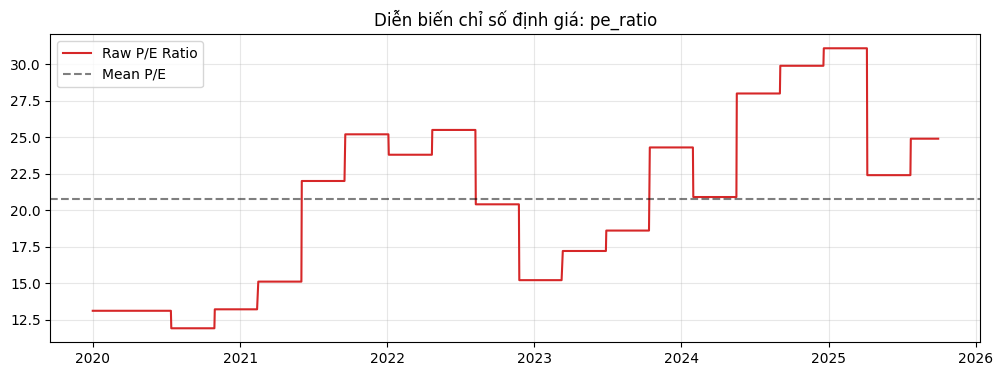


TIẾN HÀNH SAI PHÂN LOG (Log ΔP/E)

--- Phân rã thành phần chuỗi pe_ratio_log_return (Dữ liệu tháng) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: pe_ratio_log_return (Freq: ME) -----


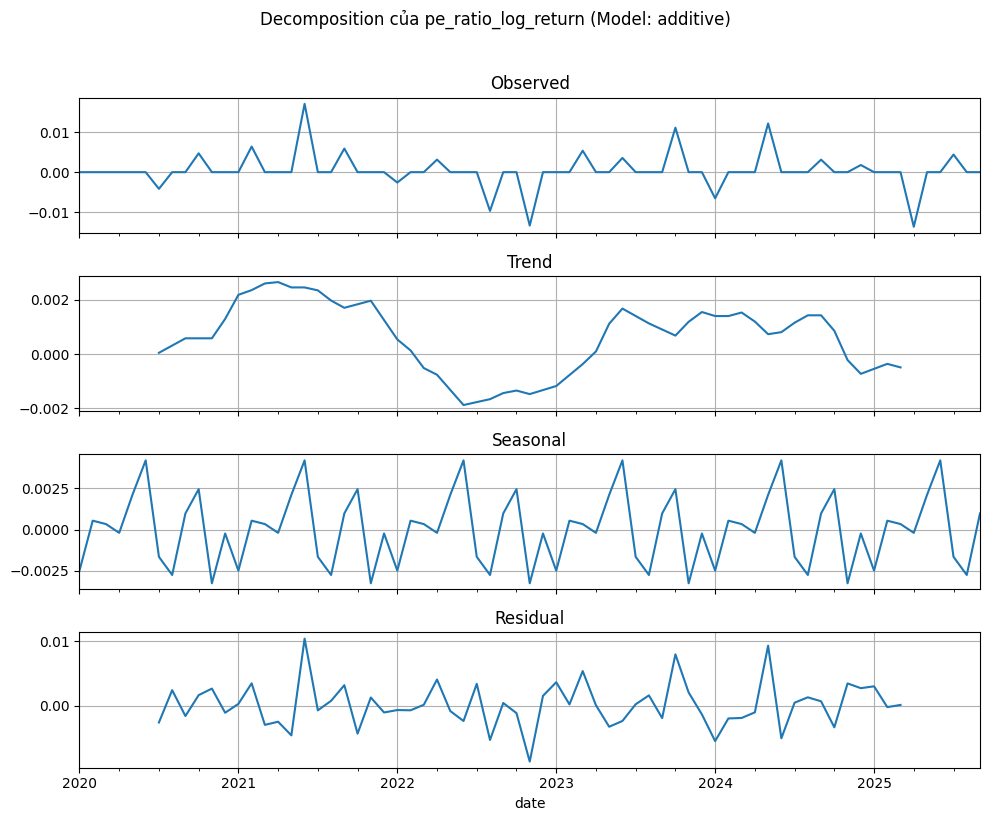


[Kiểm định] Tính dừng của Residuals (P/E Change):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: P/E Change Residuals -----
Chỉ số ADF (ADF Statistic)      : -5.4357
Giá trị p (P-value)             : 0.000031
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1443
  5%: -3.4986
  10%: -3.1784
--------------------------------------------------
KẾT LUẬN: Chuỗi CÓ TÍNH DỪNG (P-value < 0.05). Bác bỏ H0.
--------------------------------------------------


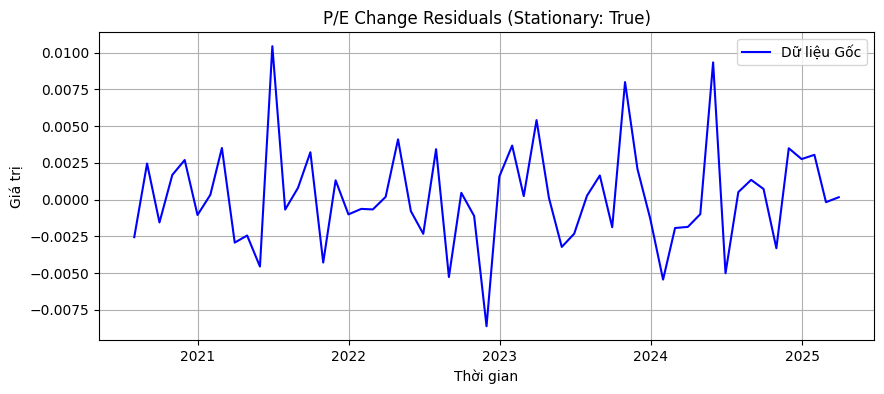


[Kiểm định] Tính dừng của P/E Log Return (SA):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: P/E Log Return (SA) -----
Chỉ số ADF (ADF Statistic)      : -3.2659
Giá trị p (P-value)             : 0.072054
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1755
  5%: -3.5130
  10%: -3.1867
--------------------------------------------------
KẾT LUẬN: Chuỗi KHÔNG CÓ TÍNH DỪNG (P-value >= 0.05). Chấp nhận H0.
--------------------------------------------------


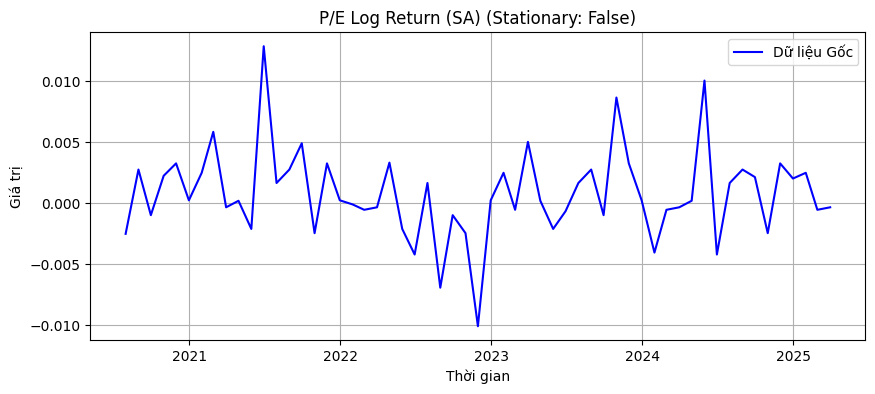


--- Chuẩn hóa StandardScaler ---

>>> Hoàn tất EDA P/E Ratio. Cột đầu ra: pe_ratio_log_return_scaled


In [129]:
def EDA_pe_ratio(df_input: pd.DataFrame, column_name: str = 'pe_ratio') -> pd.DataFrame:
    """
    Phân tích EDA cho chỉ số P/E.
    Quy trình: Xử lý Missing -> Log-Difference (Valuation Change) -> Decomposition -> Scaling.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='Raw P/E Ratio', color='tab:red', lw=1.5)
    plt.axhline(df[column_name].mean(), color='black', linestyle='--', alpha=0.5, label='Mean P/E')
    plt.title(f"Diễn biến chỉ số định giá: {column_name}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('TIẾN HÀNH SAI PHÂN LOG (Log ΔP/E)')
    print('='*30)
    new_col = f'{column_name}_log_return'
    df[new_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[new_col] = df[new_col].ffill().bfill()

    df_monthly = df[new_col].resample('ME').mean().to_frame() 
    
    print(f"\n--- Phân rã thành phần chuỗi {new_col} (Dữ liệu tháng) ---")
    decomposed = decompose_time_series(
        df_monthly.reset_index(),
        new_col,
        date_name='date',
        period=12,
        model='additive',
        freq='ME' 
    )

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (P/E Change):")
        check_stationarity(decomposed.resid.dropna(), title='P/E Change Residuals')

        pe_sa = decomposed.trend.dropna() + decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của P/E Log Return (SA):")
        check_stationarity(pe_sa, title='P/E Log Return (SA)')

    print('\n--- Chuẩn hóa StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[new_col]])
    df[f"{new_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\n>>> Hoàn tất EDA P/E Ratio. Cột đầu ra: {new_col}_scaled")
    return df

dataset_final = EDA_pe_ratio(dataset)

In [97]:
dataset.columns

Index(['cpi_rate', 'gdp_value', 'usd_vnd_rate', 'xau_usd_rate', 'market_cap',
       'pe_ratio', 'fpt_net_revenue', 'fpt_gross_profit',
       'fpt_operating_profit', 'fpt_net_profit', 'fpt_stock_price',
       'fpt_stock_volume'],
      dtype='object')

## 3.7. `fpt_net_revenue`

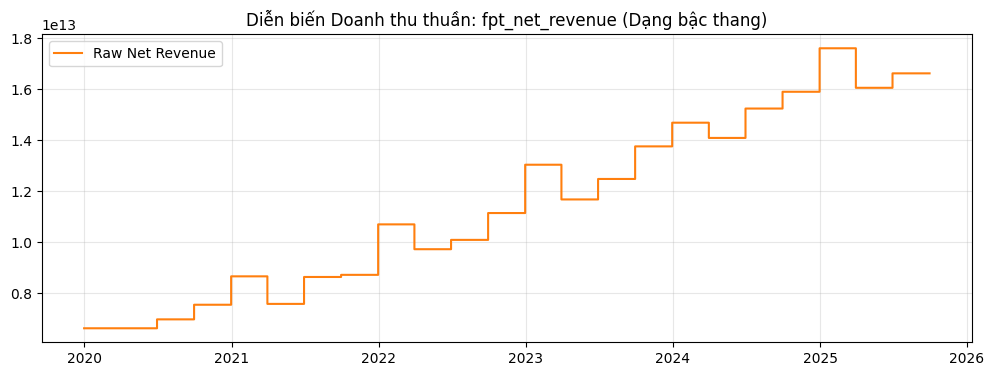


TÍNH TOÁN TỐC ĐỘ TĂNG TRƯỞNG DOANH THU (Log Growth)

--- Phân rã thành phần chuỗi fpt_net_revenue (Multiplicative) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: fpt_net_revenue (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.

--- Chuẩn hóa Growth Rate bằng StandardScaler ---

>>> Hoàn tất EDA Doanh thu. Cột đầu ra: fpt_net_revenue_growth_scaled


,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume,fpt_net_revenue_growth,fpt_net_revenue_growth_scaled
date,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,23171.0,1517.48,NaN,NaN,6.630565e+12,NaN,NaN,NaN,NaN,NaN,0.0,-0.051448
2020-01-02,NaN,NaN,23175.5,1531.30,NaN,NaN,6.630565e+12,NaN,NaN,NaN,21.39,896720.0,0.0,-0.051448
2020-01-03,NaN,NaN,23174.5,1553.45,NaN,NaN,6.630565e+12,NaN,NaN,NaN,21.03,2047880.0,0.0,-0.051448
2020-01-06,NaN,NaN,23178.0,1582.69,NaN,NaN,6.630565e+12,NaN,NaN,NaN,20.81,1091660.0,0.0,-0.051448
2020-01-07,NaN,NaN,23179.0,1577.38,NaN,NaN,6.630565e+12,NaN,NaN,NaN,21.21,837240.0,0.0,-0.051448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,NaN,NaN,26432.0,3779.54,NaN,NaN,1.662471e+13,NaN,NaN,NaN,99.50,7421100.0,0.0,-0.051448
2025-09-25,NaN,NaN,26428.0,3761.66,NaN,NaN,1.662471e+13,NaN,NaN,NaN,98.00,8627700.0,0.0,-0.051448
2025-09-26,NaN,NaN,26422.5,3783.88,NaN,NaN,1.662471e+13,NaN,NaN,NaN,97.50,8080800.0,0.0,-0.051448


In [130]:
def EDA_fpt_net_revenue(df_input: pd.DataFrame, column_name: str = 'fpt_net_revenue') -> pd.DataFrame:
    """
    Phân tích EDA cho Doanh thu thuần FPT.
    Quy trình: Xử lý bậc thang -> Log-Growth Rate -> Phân rã nhân (Multiplicative) -> Scaling.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='Raw Net Revenue', color='tab:orange', drawstyle='steps-post')
    plt.title(f"Diễn biến Doanh thu thuần: {column_name} (Dạng bậc thang)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('TÍNH TOÁN TỐC ĐỘ TĂNG TRƯỞNG DOANH THU (Log Growth)')
    print('='*30)
    growth_col = f'{column_name}_growth'
    df[growth_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[growth_col] = df[growth_col].replace([np.inf, -np.inf], 0).ffill().bfill()

    print(f"\n--- Phân rã thành phần chuỗi {column_name} (Multiplicative) ---")
    decomposed = decompose_time_series(
        df,
        column_name,
        date_name=None,
        period=12,
        model='multiplicative', 
        freq='M' 
    )

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (Revenue):")
        check_stationarity(decomposed.resid.dropna(), title='Revenue Residuals')

        rev_sa = decomposed.trend.dropna() * decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của Revenue Seasonally Adjusted:")
        check_stationarity(rev_sa, title='Revenue SA')

    print('\n--- Chuẩn hóa Growth Rate bằng StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[growth_col]])
    df[f"{growth_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\n>>> Hoàn tất EDA Doanh thu. Cột đầu ra: {growth_col}_scaled")
    return df

EDA_fpt_net_revenue(dataset)

## 3.8. `fpt_gross_profit`

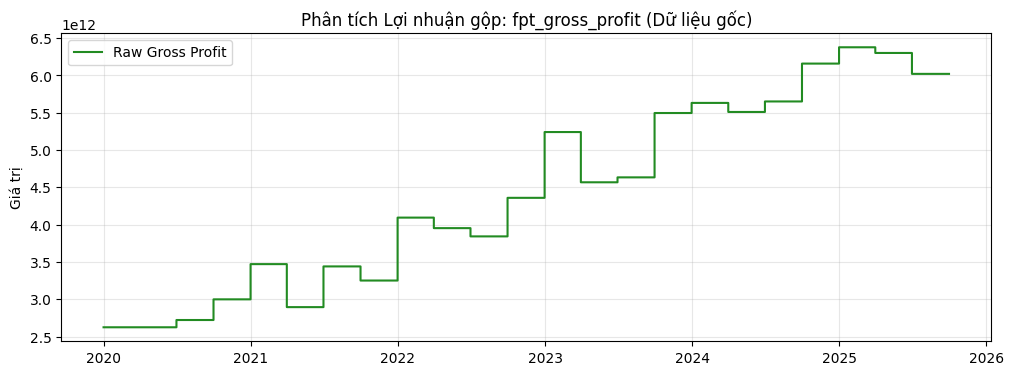


TÍNH TOÁN TỐC ĐỘ TĂNG TRƯỞNG LỢI NHUẬN (Log Growth)

--- Phân rã thành phần chuỗi fpt_gross_profit (Multiplicative) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: fpt_gross_profit (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.

--- Chuẩn hóa Growth Rate bằng StandardScaler ---

>>> Hoàn tất EDA Lợi nhuận gộp. Cột đầu ra: fpt_gross_profit_growth_scaled


,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume,fpt_gross_profit_growth,fpt_gross_profit_growth_scaled
date,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,23171.0,1517.48,NaN,NaN,NaN,2.624378e+12,NaN,NaN,NaN,NaN,0.0,-0.041368
2020-01-02,NaN,NaN,23175.5,1531.30,NaN,NaN,NaN,2.624378e+12,NaN,NaN,21.39,896720.0,0.0,-0.041368
2020-01-03,NaN,NaN,23174.5,1553.45,NaN,NaN,NaN,2.624378e+12,NaN,NaN,21.03,2047880.0,0.0,-0.041368
2020-01-06,NaN,NaN,23178.0,1582.69,NaN,NaN,NaN,2.624378e+12,NaN,NaN,20.81,1091660.0,0.0,-0.041368
2020-01-07,NaN,NaN,23179.0,1577.38,NaN,NaN,NaN,2.624378e+12,NaN,NaN,21.21,837240.0,0.0,-0.041368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,NaN,NaN,26432.0,3779.54,NaN,NaN,NaN,6.021040e+12,NaN,NaN,99.50,7421100.0,0.0,-0.041368
2025-09-25,NaN,NaN,26428.0,3761.66,NaN,NaN,NaN,6.021040e+12,NaN,NaN,98.00,8627700.0,0.0,-0.041368
2025-09-26,NaN,NaN,26422.5,3783.88,NaN,NaN,NaN,6.021040e+12,NaN,NaN,97.50,8080800.0,0.0,-0.041368


In [131]:
def EDA_fpt_gross_profit(df_input: pd.DataFrame, column_name: str = 'fpt_gross_profit') -> pd.DataFrame:
    """
    Phân tích EDA cho Lợi nhuận gộp FPT.
    Quy trình: Xử lý DatetimeIndex -> Tính Log Growth -> Phân rã Nhân (Multiplicative) -> Chuẩn hóa.
    """
    df = df_input.copy()
    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='Raw Gross Profit', color='forestgreen', drawstyle='steps-post')
    plt.title(f"Phân tích Lợi nhuận gộp: {column_name} (Dữ liệu gốc)", fontsize=12)
    plt.ylabel("Giá trị")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('TÍNH TOÁN TỐC ĐỘ TĂNG TRƯỞNG LỢI NHUẬN (Log Growth)')
    print('='*30)
    growth_col = f'{column_name}_growth'
    df[growth_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[growth_col] = df[growth_col].replace([np.inf, -np.inf], 0).ffill().bfill()

    print(f"\n--- Phân rã thành phần chuỗi {column_name} (Multiplicative) ---")
    decomposed = decompose_time_series(
        df,
        column_name, 
        date_name=None,
        period=12,
        model='multiplicative', 
        freq='M' 
    )

    

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của thành phần Residuals (Lợi nhuận):")
        check_stationarity(decomposed.resid.dropna(), title='Gross Profit Residuals')
        profit_sa = decomposed.trend.dropna() * decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của Gross Profit Seasonally Adjusted:")
        check_stationarity(profit_sa, title='Gross Profit SA')

    print('\n--- Chuẩn hóa Growth Rate bằng StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[growth_col]])
    df[f"{growth_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\n>>> Hoàn tất EDA Lợi nhuận gộp. Cột đầu ra: {growth_col}_scaled")
    return df

EDA_fpt_gross_profit(dataset)

## 3.9. `fpt_operating_profit`

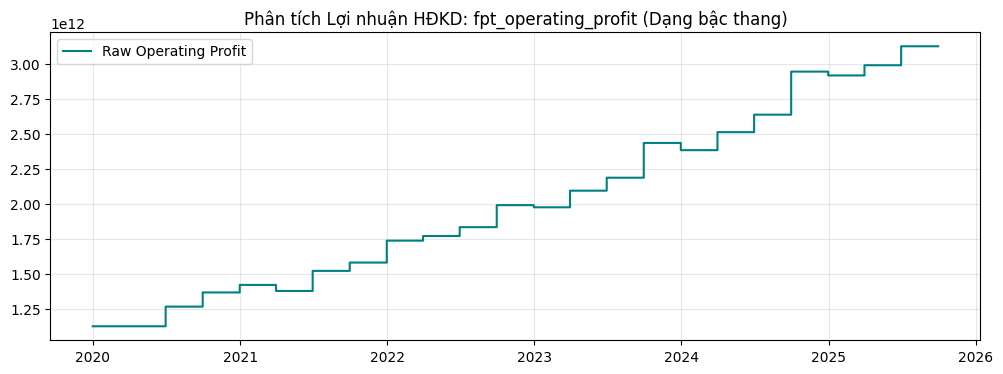


THỰC HIỆN LOG GROWTH TRANSFORMATION

--- Phân rã thành phần chuỗi fpt_operating_profit (Multiplicative) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: fpt_operating_profit (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.

--- Chuẩn hóa Growth Rate bằng StandardScaler ---

Đã hoàn tất. Cột feature: fpt_operating_profit_growth_scaled


,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume,fpt_operating_profit_growth,fpt_operating_profit_growth_scaled
date,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,23171.0,1517.48,NaN,NaN,NaN,NaN,1.127536e+12,NaN,NaN,NaN,0.0,-0.088371
2020-01-02,NaN,NaN,23175.5,1531.30,NaN,NaN,NaN,NaN,1.127536e+12,NaN,21.39,896720.0,0.0,-0.088371
2020-01-03,NaN,NaN,23174.5,1553.45,NaN,NaN,NaN,NaN,1.127536e+12,NaN,21.03,2047880.0,0.0,-0.088371
2020-01-06,NaN,NaN,23178.0,1582.69,NaN,NaN,NaN,NaN,1.127536e+12,NaN,20.81,1091660.0,0.0,-0.088371
2020-01-07,NaN,NaN,23179.0,1577.38,NaN,NaN,NaN,NaN,1.127536e+12,NaN,21.21,837240.0,0.0,-0.088371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,NaN,NaN,26432.0,3779.54,NaN,NaN,NaN,NaN,3.129409e+12,NaN,99.50,7421100.0,0.0,-0.088371
2025-09-25,NaN,NaN,26428.0,3761.66,NaN,NaN,NaN,NaN,3.129409e+12,NaN,98.00,8627700.0,0.0,-0.088371
2025-09-26,NaN,NaN,26422.5,3783.88,NaN,NaN,NaN,NaN,3.129409e+12,NaN,97.50,8080800.0,0.0,-0.088371


In [135]:
def EDA_fpt_operating_profit(df_input: pd.DataFrame, column_name: str = 'fpt_operating_profit') -> pd.DataFrame:
    """
    Phân tích EDA cho Lợi nhuận HĐKD FPT.
    Quy trình: Xử lý DatetimeIndex -> Log Growth Transformation -> Phân rã Nhân -> Scaling.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='Raw Operating Profit', color='teal', drawstyle='steps-post')
    plt.title(f"Phân tích Lợi nhuận HĐKD: {column_name} (Dạng bậc thang)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('THỰC HIỆN LOG GROWTH TRANSFORMATION')
    print('='*30)
    growth_col = f'{column_name}_growth'
    df[growth_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[growth_col] = df[growth_col].replace([np.inf, -np.inf], 0).ffill().bfill()

    print(f"\n--- Phân rã thành phần chuỗi {column_name} (Multiplicative) ---")
    decomposed = decompose_time_series(
        df,
        column_name, 
        date_name=None,
        period=12,
        model='multiplicative', 
        freq='M' 
    )

    

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (Operating Profit):")
        check_stationarity(decomposed.resid.dropna(), title='Operating Profit Residuals')

        op_sa = decomposed.trend.dropna() * decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của Operating Profit (SA):")
        check_stationarity(op_sa, title='Operating Profit SA')

    print('\n--- Chuẩn hóa Growth Rate bằng StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[growth_col]])
    df[f"{growth_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\nĐã hoàn tất. Cột feature: {growth_col}_scaled")
    return df

EDA_fpt_operating_profit(dataset)

## 3.10. `fpt_net_profit`

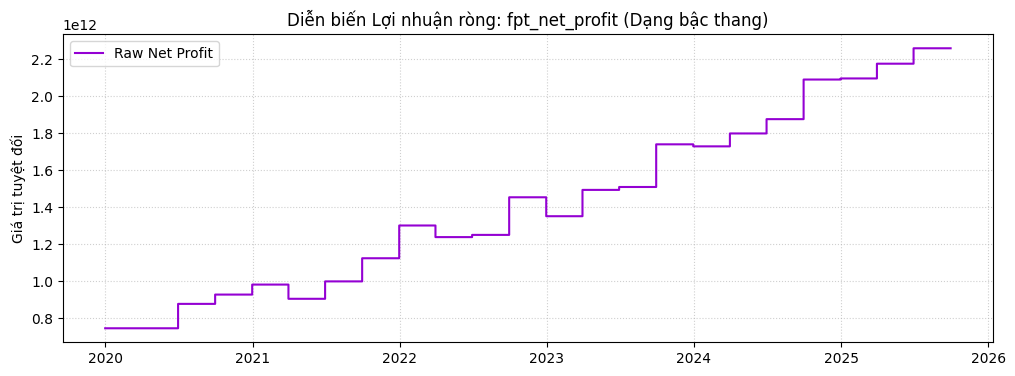


THỰC HIỆN LOG GROWTH TRANSFORMATION

--- Phân rã thành phần chuỗi fpt_net_profit (Multiplicative) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: fpt_net_profit (Freq: M) -----
LỖI: DataFrame không có cột 'None'. Hãy kiểm tra tên cột ngày tháng.

--- Chuẩn hóa Growth Rate bằng StandardScaler ---

Hoàn tất. Biến mục tiêu/feature: fpt_net_profit_growth_scaled đã sẵn sàng.


,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume,fpt_net_profit_growth,fpt_net_profit_growth_scaled
date,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,23171.0,1517.48,NaN,NaN,NaN,NaN,NaN,7.471051e+11,NaN,NaN,0.0,-0.070325
2020-01-02,NaN,NaN,23175.5,1531.30,NaN,NaN,NaN,NaN,NaN,7.471051e+11,21.39,896720.0,0.0,-0.070325
2020-01-03,NaN,NaN,23174.5,1553.45,NaN,NaN,NaN,NaN,NaN,7.471051e+11,21.03,2047880.0,0.0,-0.070325
2020-01-06,NaN,NaN,23178.0,1582.69,NaN,NaN,NaN,NaN,NaN,7.471051e+11,20.81,1091660.0,0.0,-0.070325
2020-01-07,NaN,NaN,23179.0,1577.38,NaN,NaN,NaN,NaN,NaN,7.471051e+11,21.21,837240.0,0.0,-0.070325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,NaN,NaN,26432.0,3779.54,NaN,NaN,NaN,NaN,NaN,2.257463e+12,99.50,7421100.0,0.0,-0.070325
2025-09-25,NaN,NaN,26428.0,3761.66,NaN,NaN,NaN,NaN,NaN,2.257463e+12,98.00,8627700.0,0.0,-0.070325
2025-09-26,NaN,NaN,26422.5,3783.88,NaN,NaN,NaN,NaN,NaN,2.257463e+12,97.50,8080800.0,0.0,-0.070325


In [134]:
def EDA_fpt_net_profit(df_input: pd.DataFrame, column_name: str = 'fpt_net_profit') -> pd.DataFrame:
    """
    Phân tích EDA chuyên sâu cho Lợi nhuận ròng (Net Profit).
    Quy trình: Xử lý DatetimeIndex -> Tính Log Growth -> Decomposition -> Stationarity Test -> Scaling.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='Raw Net Profit', color='darkviolet', drawstyle='steps-post')
    plt.title(f"Diễn biến Lợi nhuận ròng: {column_name} (Dạng bậc thang)", fontsize=12)
    plt.ylabel("Giá trị tuyệt đối")
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('THỰC HIỆN LOG GROWTH TRANSFORMATION')
    print('='*30)
    growth_col = f'{column_name}_growth'
    df[growth_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[growth_col] = df[growth_col].replace([np.inf, -np.inf], 0).ffill().bfill()

    print(f"\n--- Phân rã thành phần chuỗi {column_name} (Multiplicative) ---")
    decomposed = decompose_time_series(
        df,
        column_name, 
        date_name=None, 
        period=12,
        model='multiplicative', 
        freq='M' 
    )

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (Net Profit):")
        check_stationarity(decomposed.resid.dropna(), title='Net Profit Residuals')

        profit_sa = decomposed.trend.dropna() * decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của Net Profit (Seasonally Adjusted):")
        check_stationarity(profit_sa, title='Net Profit SA')

    print('\n--- Chuẩn hóa Growth Rate bằng StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[growth_col]])
    df[f"{growth_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)
    
    print(f"\nHoàn tất. Biến mục tiêu/feature: {growth_col}_scaled đã sẵn sàng.")
    return df

EDA_fpt_net_profit(dataset)

In [105]:
dataset.columns

Index(['cpi_rate', 'gdp_value', 'usd_vnd_rate', 'xau_usd_rate', 'market_cap',
       'pe_ratio', 'fpt_net_revenue', 'fpt_gross_profit',
       'fpt_operating_profit', 'fpt_net_profit', 'fpt_stock_price',
       'fpt_stock_volume'],
      dtype='object')

## 3.11. `fpt_stock_price`

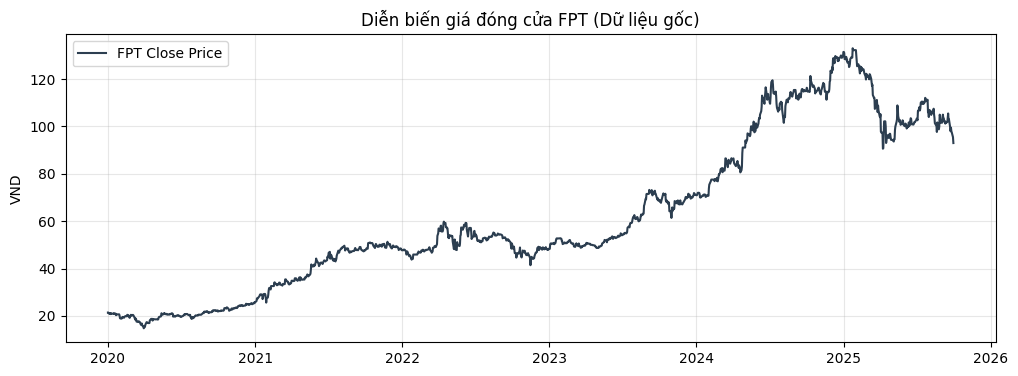


THỰC HIỆN SAI PHÂN LOG (Daily Log Returns)


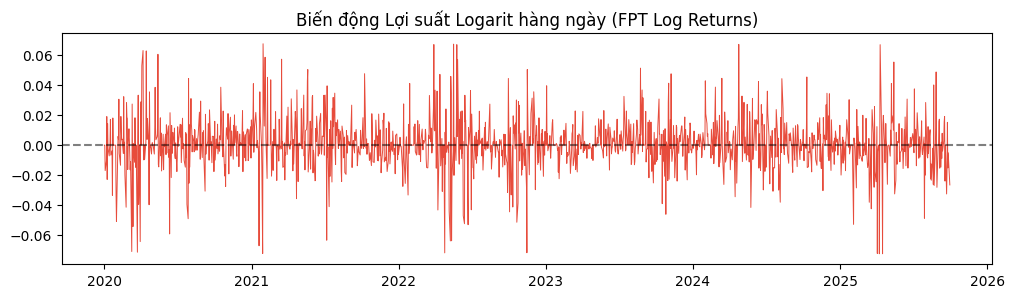


--- Phân rã thành phần chuỗi fpt_stock_log_return (Dữ liệu tháng) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: fpt_stock_log_return (Freq: M) -----


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_26132\1521711660.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series_freq = series.asfreq(freq)


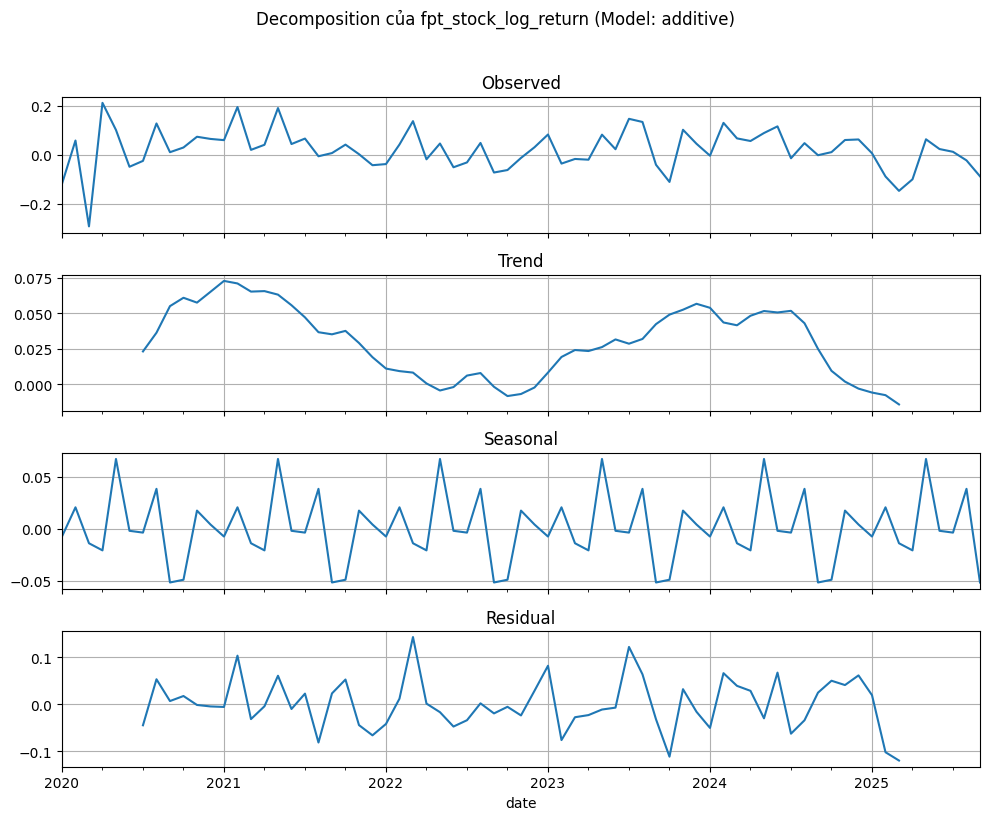


[Kiểm định] Tính dừng của Residuals (Stock Returns):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: Stock Returns Residuals -----
Chỉ số ADF (ADF Statistic)      : -2.8038
Giá trị p (P-value)             : 0.195543
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1755
  5%: -3.5130
  10%: -3.1867
--------------------------------------------------
KẾT LUẬN: Chuỗi KHÔNG CÓ TÍNH DỪNG (P-value >= 0.05). Chấp nhận H0.
--------------------------------------------------


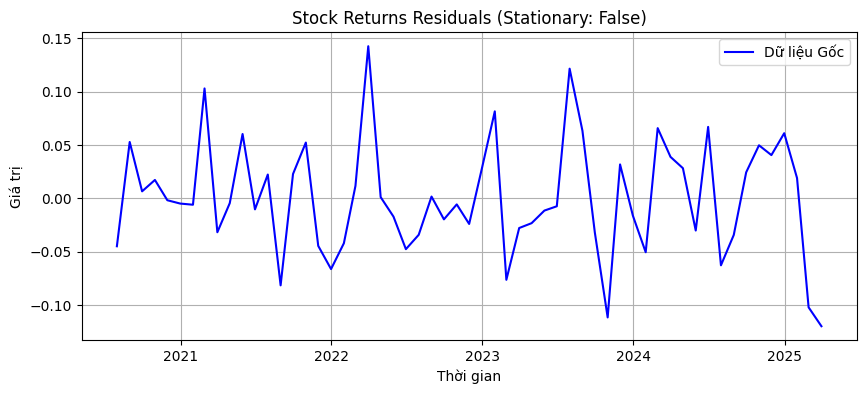


[Kiểm định] Tính dừng của Stock Log Return (SA):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: FPT Stock Return (SA) -----
Chỉ số ADF (ADF Statistic)      : -5.2403
Giá trị p (P-value)             : 0.000073
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1303
  5%: -3.4920
  10%: -3.1746
--------------------------------------------------
KẾT LUẬN: Chuỗi CÓ TÍNH DỪNG (P-value < 0.05). Bác bỏ H0.
--------------------------------------------------


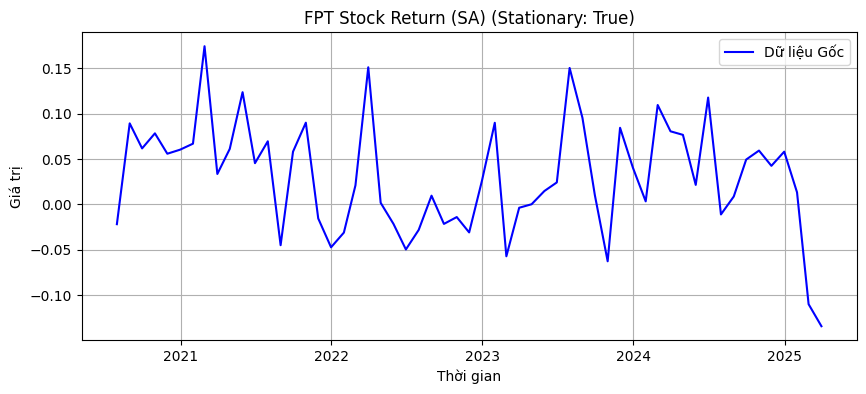


--- Chuẩn hóa Lợi suất bằng StandardScaler ---

>>> Hoàn tất EDA FPT Stock. Biến sẵn sàng: fpt_stock_log_return_scaled


,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume,fpt_stock_log_return,fpt_stock_log_return_scaled
date,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,23171.0,1517.48,NaN,NaN,NaN,NaN,NaN,NaN,21.39,NaN,0.000000,-0.055765
2020-01-02,NaN,NaN,23175.5,1531.30,NaN,NaN,NaN,NaN,NaN,NaN,21.39,896720.0,0.000000,-0.055765
2020-01-03,NaN,NaN,23174.5,1553.45,NaN,NaN,NaN,NaN,NaN,NaN,21.03,2047880.0,-0.016974,-1.040504
2020-01-06,NaN,NaN,23178.0,1582.69,NaN,NaN,NaN,NaN,NaN,NaN,20.81,1091660.0,-0.010516,-0.665883
2020-01-07,NaN,NaN,23179.0,1577.38,NaN,NaN,NaN,NaN,NaN,NaN,21.21,837240.0,0.019039,1.048811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,NaN,NaN,26432.0,3779.54,NaN,NaN,NaN,NaN,NaN,NaN,99.50,7421100.0,0.015190,0.825509
2025-09-25,NaN,NaN,26428.0,3761.66,NaN,NaN,NaN,NaN,NaN,NaN,98.00,8627700.0,-0.015190,-0.937040
2025-09-26,NaN,NaN,26422.5,3783.88,NaN,NaN,NaN,NaN,NaN,NaN,97.50,8080800.0,-0.005115,-0.352523


In [136]:
def EDA_fpt_stock_price(df_input: pd.DataFrame, column_name: str = 'fpt_stock_price') -> pd.DataFrame:
    """
    Phân tích EDA cho giá cổ phiếu FPT. 
    Đây thường là biến mục tiêu (Target Variable) hoặc biến dẫn dắt.
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()

    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column_name], label='FPT Close Price', color='#2c3e50', lw=1.5)
    plt.title("Diễn biến giá đóng cửa FPT (Dữ liệu gốc)", fontsize=12)
    plt.ylabel("VND")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('THỰC HIỆN SAI PHÂN LOG (Daily Log Returns)')
    print('='*30)
    new_column_name = 'fpt_stock_log_return'
    df[new_column_name] = np.log(df[column_name] / df[column_name].shift(1))
    df[new_column_name] = df[new_column_name].ffill().bfill()

    plt.figure(figsize=(12, 3))
    plt.plot(df.index, df[new_column_name], color='#e74c3c', lw=0.7)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.title("Biến động Lợi suất Logarit hàng ngày (FPT Log Returns)")
    plt.show()

    df_monthly = df[new_column_name].resample('ME').sum().to_frame()

    print(f"\n--- Phân rã thành phần chuỗi {new_column_name} (Dữ liệu tháng) ---")
    decomposed = decompose_time_series(
        df_monthly.reset_index(),
        new_column_name,
        date_name='date',
        period=12,        
        model='additive',
        freq='M' 
    )
    
    

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (Stock Returns):")
        check_stationarity(decomposed.resid.dropna(), title='Stock Returns Residuals')
        stock_sa = decomposed.trend.dropna() + decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của Stock Log Return (SA):")
        check_stationarity(stock_sa, title='FPT Stock Return (SA)')

    print('\n--- Chuẩn hóa Lợi suất bằng StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[new_column_name]])
    df[f"{new_column_name}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)

    print(f"\n>>> Hoàn tất EDA FPT Stock. Biến sẵn sàng: {new_column_name}_scaled")
    return df

EDA_fpt_stock_price(dataset)

## 3.12. `fpt_stock_volume`

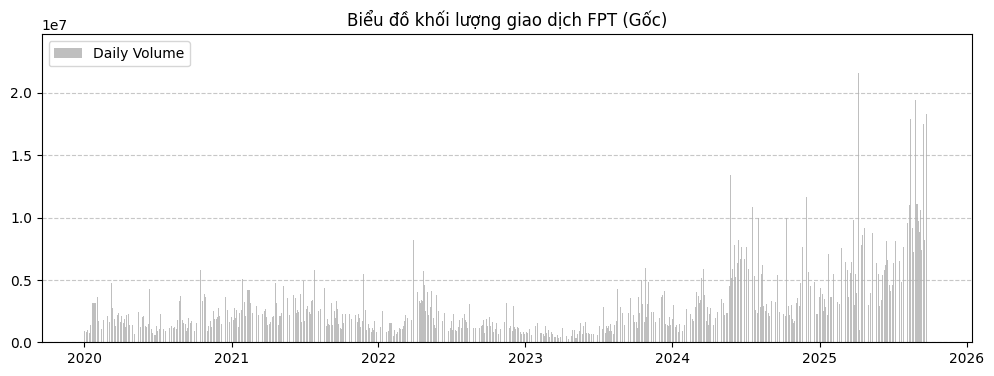


TIẾN HÀNH SAI PHÂN LOG (Volume Growth)

--- Phân rã thành phần Volume fpt_volume_log_return (Dữ liệu tháng) ---

----- BẮT ĐẦU PHÂN TÍCH DECOMPOSITION: fpt_volume_log_return (Freq: M) -----


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_26132\1521711660.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  series_freq = series.asfreq(freq)


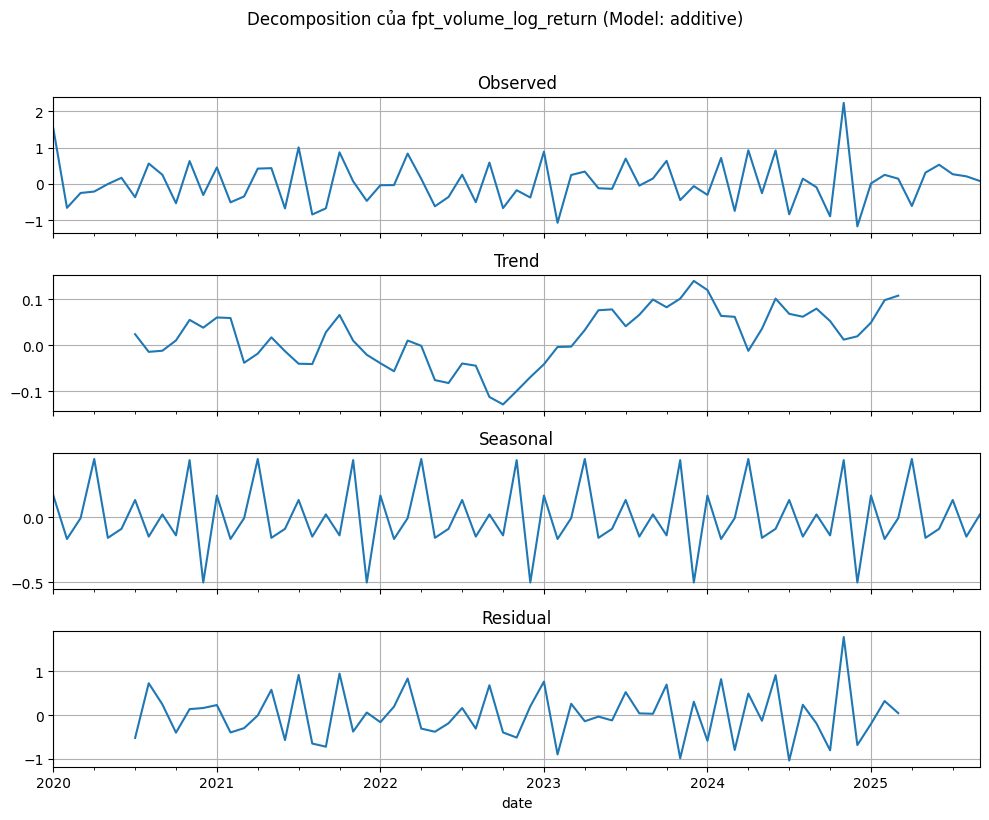


[Kiểm định] Tính dừng của Residuals (Volume Change):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: Volume Residuals -----
Chỉ số ADF (ADF Statistic)      : -2.2273
Giá trị p (P-value)             : 0.474513
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1704
  5%: -3.5107
  10%: -3.1853
--------------------------------------------------
KẾT LUẬN: Chuỗi KHÔNG CÓ TÍNH DỪNG (P-value >= 0.05). Chấp nhận H0.
--------------------------------------------------


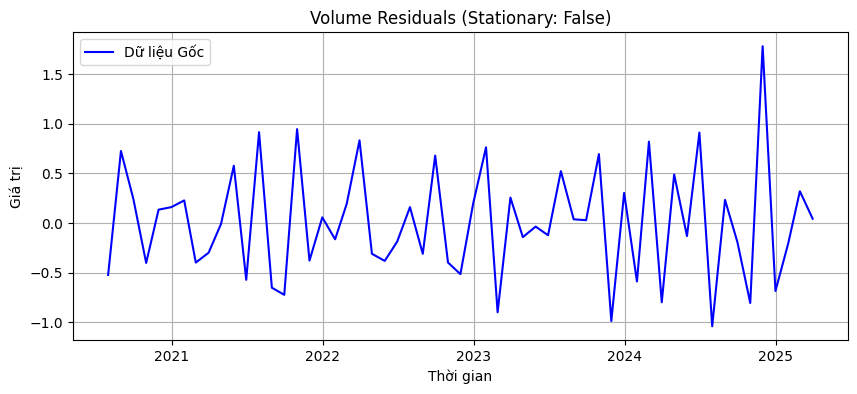


[Kiểm định] Tính dừng của Volume (Seasonally Adjusted):

----- KIỂM ĐỊNH TÍNH DỪNG (ADF) CHO: Volume SA -----
Chỉ số ADF (ADF Statistic)      : -8.6216
Giá trị p (P-value)             : 0.000000
Ngưỡng ý nghĩa (Critical Value) :
  1%: -4.1336
  5%: -3.4936
  10%: -3.1755
--------------------------------------------------
KẾT LUẬN: Chuỗi CÓ TÍNH DỪNG (P-value < 0.05). Bác bỏ H0.
--------------------------------------------------


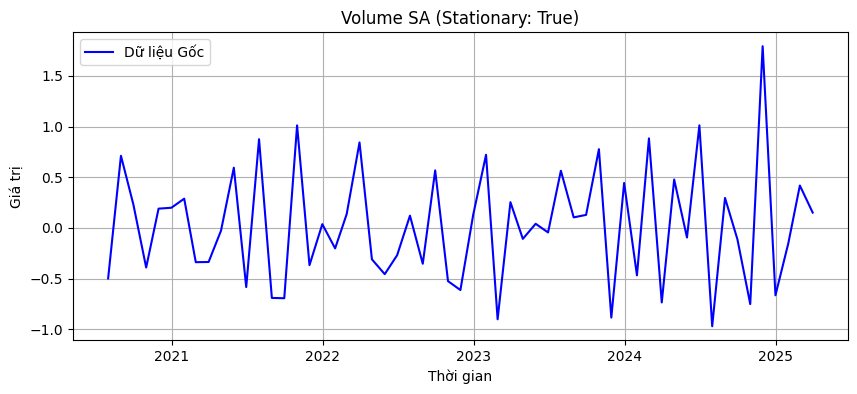


--- Chuẩn hóa Volume Growth bằng StandardScaler ---

>>> Hoàn tất EDA Volume. Biến sẵn sàng: fpt_volume_log_return_scaled


,cpi_rate,gdp_value,usd_vnd_rate,xau_usd_rate,market_cap,pe_ratio,fpt_net_revenue,fpt_gross_profit,fpt_operating_profit,fpt_net_profit,fpt_stock_price,fpt_stock_volume,fpt_volume_log_return,fpt_volume_log_return_scaled
date,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,23171.0,1517.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896720.0,0.000000,-0.003521
2020-01-02,NaN,NaN,23175.5,1531.30,NaN,NaN,NaN,NaN,NaN,NaN,21.39,896720.0,0.000000,-0.003521
2020-01-03,NaN,NaN,23174.5,1553.45,NaN,NaN,NaN,NaN,NaN,NaN,21.03,2047880.0,0.825817,1.709207
2020-01-06,NaN,NaN,23178.0,1582.69,NaN,NaN,NaN,NaN,NaN,NaN,20.81,1091660.0,-0.629106,-1.308273
2020-01-07,NaN,NaN,23179.0,1577.38,NaN,NaN,NaN,NaN,NaN,NaN,21.21,837240.0,-0.265344,-0.553839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-24,NaN,NaN,26432.0,3779.54,NaN,NaN,NaN,NaN,NaN,NaN,99.50,7421100.0,-0.902093,-1.874443
2025-09-25,NaN,NaN,26428.0,3761.66,NaN,NaN,NaN,NaN,NaN,NaN,98.00,8627700.0,0.150651,0.308926
2025-09-26,NaN,NaN,26422.5,3783.88,NaN,NaN,NaN,NaN,NaN,NaN,97.50,8080800.0,-0.065487,-0.139339


In [137]:
def EDA_fpt_stock_volume(df_input: pd.DataFrame, column_name: str = 'fpt_stock_volume') -> pd.DataFrame:
    """
    Phân tích EDA cho khối lượng giao dịch.
    Mục tiêu: Phát hiện các điểm bùng nổ thanh khoản (Volume Spikes).
    """
    df = df_input.copy()

    df[column_name] = df[column_name].ffill().bfill()
    df[column_name] = df[column_name].replace(0, 1) 

    plt.figure(figsize=(12, 4))
    plt.bar(df.index, df[column_name], color='gray', alpha=0.5, label='Daily Volume')
    plt.title(f"Biểu đồ khối lượng giao dịch FPT (Gốc)", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

    print('\n' + '='*30)
    print('TIẾN HÀNH SAI PHÂN LOG (Volume Growth)')
    print('='*30)
    new_col = 'fpt_volume_log_return'
    df[new_col] = np.log(df[column_name] / df[column_name].shift(1))
    df[new_col] = df[new_col].ffill().bfill()

    df_monthly = df[new_col].resample('ME').sum().to_frame()

    print(f"\n--- Phân rã thành phần Volume {new_col} (Dữ liệu tháng) ---")
    decomposed = decompose_time_series(
        df_monthly.reset_index(),
        new_col,
        date_name='date',
        period=12,
        model='additive', 
        freq='M' 
    )
    

    if decomposed is not None:
        print("\n[Kiểm định] Tính dừng của Residuals (Volume Change):")
        check_stationarity(decomposed.resid.dropna(), title='Volume Residuals')
        vol_sa = decomposed.trend.dropna() + decomposed.resid.dropna()
        print("\n[Kiểm định] Tính dừng của Volume (Seasonally Adjusted):")
        check_stationarity(vol_sa, title='Volume SA')

    print('\n--- Chuẩn hóa Volume Growth bằng StandardScaler ---')
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[[new_col]])
    df[f"{new_col}_scaled"] = pd.Series(scaled_values.flatten(), index=df.index)

    print(f"\n>>> Hoàn tất EDA Volume. Biến sẵn sàng: {new_col}_scaled")
    return df

EDA_fpt_stock_volume(dataset)

# 4. TIỀN XỬ LÝ TỔNG

In [138]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## 4.1. Tool cho pipeline

In [139]:
# ==============================================================================
# Custom Transformer cho NHÓM 1 (Log Return + Scale)
# ==============================================================================
class Group1LogReturnScaler(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.scalers = {col: StandardScaler() for col in cols}

    def fit(self, X, y=None):
        df = X.copy()
        for col in self.cols:
            if col in df.columns:
                series = df[col].ffill().bfill()
                log_ret = np.log(series / series.shift(1))
                log_ret = log_ret.replace([np.inf, -np.inf], 0).ffill().bfill()
                self.scalers[col].fit(log_ret.values.reshape(-1, 1))
        return self

    def transform(self, X):
        df = X.copy()
        if not isinstance(df.index, pd.DatetimeIndex):
            df.index = pd.to_datetime(df.index)
            
        print(f"--- [Pipeline] Đang xử lý Group 1 (Log Returns) cho {len(self.cols)} biến ---")
        
        for col in self.cols:
            if col in df.columns:
                df[col] = df[col].ffill().bfill()
                new_col_name = f"{col}_log_return"
                df[new_col_name] = np.log(df[col] / df[col].shift(1))
                df[new_col_name] = df[new_col_name].replace([np.inf, -np.inf], 0).ffill().bfill()
                scaled_col_name = f"{col}_log_return_scaled"

                scaled_data = self.scalers[col].transform(df[new_col_name].values.reshape(-1, 1))
                df[scaled_col_name] = pd.Series(scaled_data.flatten(), index=df.index)
        return df

In [140]:
# ==============================================================================
# Custom Transformer cho NHÓM 2 (Volume)
# ==============================================================================
class Group2VolumeScaler(BaseEstimator, TransformerMixin):
    def __init__(self, col_name='fpt_stock_volume'):
        self.col_name = col_name
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        if self.col_name in X.columns:
            df = X.copy()
            series = df[self.col_name].ffill().bfill().replace(0, 1)
            log_ret = np.log(series / series.shift(1))
            log_ret = log_ret.ffill().bfill()
            
            self.scaler.fit(log_ret.values.reshape(-1, 1))
        return self

    def transform(self, X):
        df = X.copy()
        if self.col_name in df.columns:
            col = self.col_name
            df[col] = df[col].ffill().bfill().replace(0, 1)
            
            new_col_name = f"{col}_log_return"
            df[new_col_name] = np.log(df[col] / df[col].shift(1))
            df[new_col_name] = df[new_col_name].ffill().bfill()
            
            scaled_col_name = f"{col}_log_return_scaled"
            scaled_data = self.scaler.transform(df[new_col_name].values.reshape(-1, 1))
            df[scaled_col_name] = pd.Series(scaled_data.flatten(), index=df.index)
        return df

In [141]:
# ==============================================================================
# Custom Transformer cho NHÓM 3 (Scale Only)
# ==============================================================================
class Group3SimpleScaler(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.scalers = {col: StandardScaler() for col in cols}

    def fit(self, X, y=None):
        df = X.copy()
        for col in self.cols:
            if col in df.columns:
                data = df[col].ffill().bfill()
                self.scalers[col].fit(data.values.reshape(-1, 1))
        return self

    def transform(self, X):
        df = X.copy()
        print(f"--- [Pipeline] Đang xử lý Group 3 (Scale Only) cho {len(self.cols)} biến ---")
        for col in self.cols:
            if col in df.columns:
                df[col] = df[col].ffill().bfill()
                
                scaled_col_name = f"{col}_scaled"
                scaled_data = self.scalers[col].transform(df[col].values.reshape(-1, 1))
                df[scaled_col_name] = pd.Series(scaled_data.flatten(), index=df.index)
        return df

## 4.2. Pipeline tiền xử lý

In [143]:
log_return_cols = [
    'fpt_stock_price', 'market_cap', 'pe_ratio', 
    'usd_vnd_rate', 'xau_usd_rate', 
    'fpt_net_revenue', 'fpt_gross_profit', 'fpt_operating_profit', 'fpt_net_profit', 
    'gdp_value' 
]
scale_only_cols = ['cpi_rate']

In [144]:
pipeline = Pipeline([
    ('group1_log_return', Group1LogReturnScaler(cols=log_return_cols)),
    ('group2_volume', Group2VolumeScaler(col_name='fpt_stock_volume')),
    ('group3_simple_scale', Group3SimpleScaler(cols=scale_only_cols))
])

In [145]:
df_preprocessed = pipeline.fit_transform(dataset)

print(f"Kích thước dataset sau xử lý: {df_preprocessed.shape}")
print(df_preprocessed.filter(like='_scaled').head())

--- [Pipeline] Đang xử lý Group 1 (Log Returns) cho 10 biến ---
--- [Pipeline] Đang xử lý Group 3 (Scale Only) cho 1 biến ---
Kích thước dataset sau xử lý: (1529, 35)
            fpt_stock_price_log_return_scaled  market_cap_log_return_scaled  \
date                                                                          
2020-01-01                          -0.055765                     -0.049159   
2020-01-02                          -0.055765                     -0.049159   
2020-01-03                          -1.040504                     -0.049159   
2020-01-06                          -0.665883                     -0.049159   
2020-01-07                           1.048811                     -0.049159   

            pe_ratio_log_return_scaled  usd_vnd_rate_log_return_scaled  \
date                                                                     
2020-01-01                   -0.020095                        0.067868   
2020-01-02                   -0.020095                   

# 4. Phân tích tương quan

In [146]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

def calculate_corr_pvalues(df: pd.DataFrame):
    """
    Tính ma trận tương quan Pearson và ma trận P-value tương ứng.
    
    Input: DataFrame (đã xử lý missing value)
    Output: 
        - corr_matrix: Ma trận hệ số tương quan
        - p_value_matrix: Ma trận P-value
    """
    # Chỉ lấy các cột số
    df_numeric = df.select_dtypes(include=[np.number])
    cols = df_numeric.columns
    corr_matrix = pd.DataFrame(index=cols, columns=cols)
    p_value_matrix = pd.DataFrame(index=cols, columns=cols)
    
    # Tính toán từng cặp
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0
                p_value_matrix.loc[col1, col2] = 0.0
            else:
                # Tính pearsonr
                corr, p_val = pearsonr(df_numeric[col1], df_numeric[col2])
                corr_matrix.loc[col1, col2] = corr
                p_value_matrix.loc[col1, col2] = p_val
                
    # Chuyển đổi kiểu dữ liệu sang float để dễ xử lý sau này
    corr_matrix = corr_matrix.astype(float)
    p_value_matrix = p_value_matrix.astype(float)
    
    return corr_matrix, p_value_matrix

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_significance_heatmap(corr_matrix, p_value_matrix, figsize=(12, 10), title="Correlation Matrix", threshold=0.5):
    """
    Vẽ heatmap và TRẢ VỀ danh sách các biến ĐỘC LẬP (không bị đa cộng tuyến).
    
    Cơ chế lọc:
    - Duyệt qua từng cặp biến.
    - Nếu tương quan > threshold (và p-value < 0.05): Loại bỏ biến phía sau, giữ biến phía trước.
    
    Returns:
        final_features (list): Danh sách các biến ĐÃ ĐƯỢC CHỌN LỌC (Sạch).
    """
    # --- Vẽ Heatmap ---
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
                vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
    plt.title(title)
    plt.show()

    # --- Loại bỏ biến đa cộng tuyến ---
    cols = corr_matrix.columns
    drop_cols = set()
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            col1 = cols[i]
            col2 = cols[j]
            
            if col2 in drop_cols:
                continue
                
            p_val = p_value_matrix.loc[col1, col2]
            corr = corr_matrix.loc[col1, col2]
            
            if p_val < 0.05 and abs(corr) > threshold:
                print(f"❌ Loại bỏ '{col2}' vì tương quan cao với '{col1}' (Corr={corr:.2f})")
                drop_cols.add(col2)

    # --- Tạo danh sách cuối cùng ---
    final_features = [c for c in cols if c not in drop_cols]
    
    print("\n" + "="*50)
    print("DANH SÁCH BIẾN CUỐI CÙNG (SẠCH) ĐỂ CHẠY MODEL:")
    print(final_features)
    print("="*50)
    
    return final_features

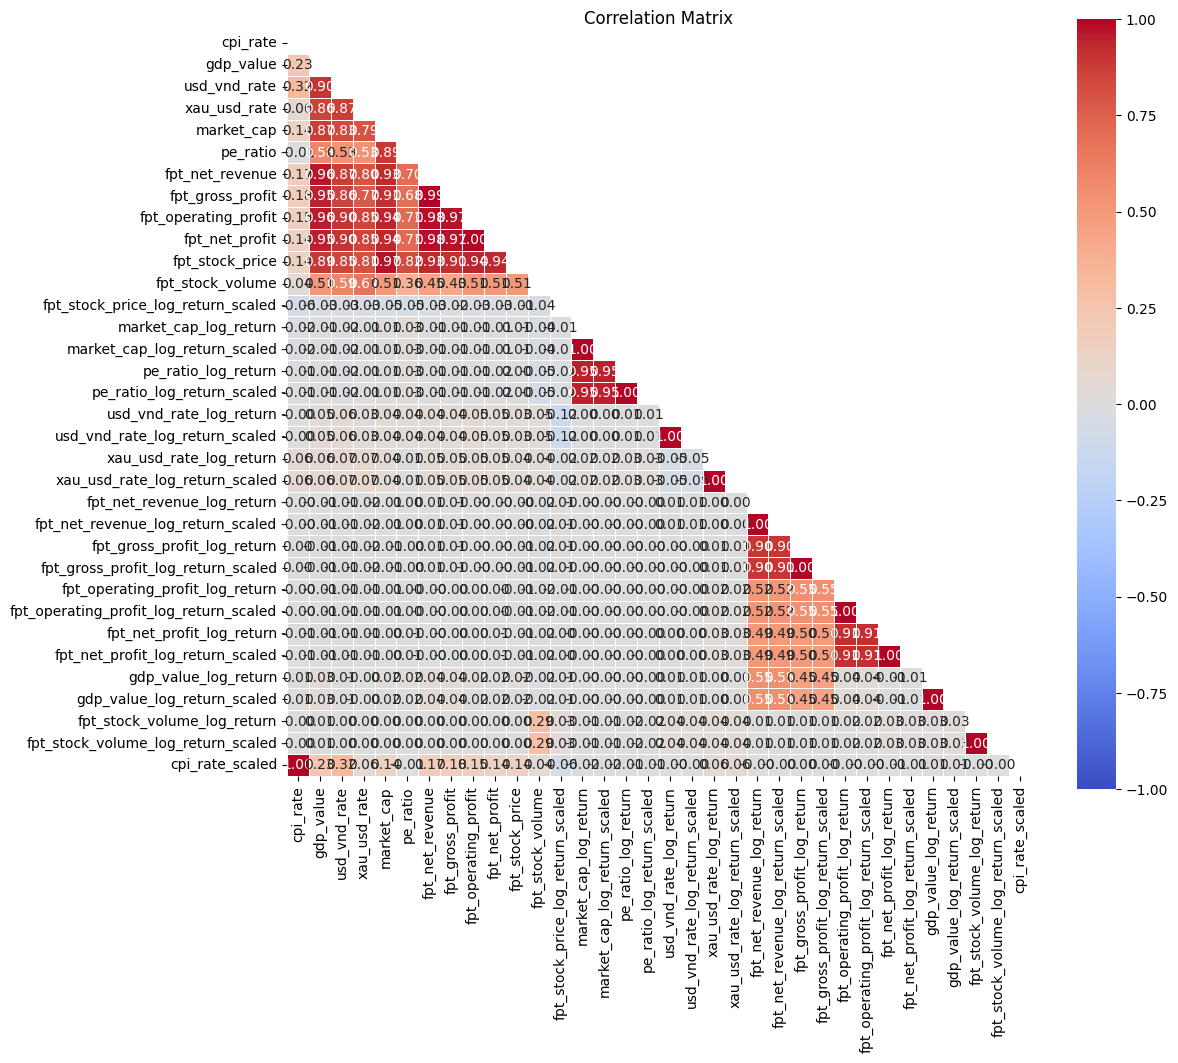

❌ Loại bỏ 'cpi_rate_scaled' vì tương quan cao với 'cpi_rate' (Corr=1.00)
❌ Loại bỏ 'usd_vnd_rate' vì tương quan cao với 'gdp_value' (Corr=0.90)
❌ Loại bỏ 'xau_usd_rate' vì tương quan cao với 'gdp_value' (Corr=0.86)
❌ Loại bỏ 'market_cap' vì tương quan cao với 'gdp_value' (Corr=0.87)
❌ Loại bỏ 'pe_ratio' vì tương quan cao với 'gdp_value' (Corr=0.58)
❌ Loại bỏ 'fpt_net_revenue' vì tương quan cao với 'gdp_value' (Corr=0.96)
❌ Loại bỏ 'fpt_gross_profit' vì tương quan cao với 'gdp_value' (Corr=0.95)
❌ Loại bỏ 'fpt_operating_profit' vì tương quan cao với 'gdp_value' (Corr=0.96)
❌ Loại bỏ 'fpt_net_profit' vì tương quan cao với 'gdp_value' (Corr=0.95)
❌ Loại bỏ 'fpt_stock_price' vì tương quan cao với 'gdp_value' (Corr=0.89)
❌ Loại bỏ 'fpt_stock_volume' vì tương quan cao với 'gdp_value' (Corr=0.51)
❌ Loại bỏ 'market_cap_log_return_scaled' vì tương quan cao với 'market_cap_log_return' (Corr=1.00)
❌ Loại bỏ 'pe_ratio_log_return' vì tương quan cao với 'market_cap_log_return' (Corr=0.95)
❌ Loại bỏ 

In [154]:
cols_to_analyze = [c for c in df_preprocessed.columns if c not in ['date', 'fpt_stock_price_log_return']]
df_input = df_preprocessed[cols_to_analyze]
corr, p_vals = calculate_corr_pvalues(df_input)
variables = plot_significance_heatmap(corr, p_vals)

In [ ]:
print(len(variables), "biến được chọn sau lọc đa cộng tuyến.")
variables.extend(['date', 'fpt_stock_price', 'fpt_stock_price_log_return'])
variables.remove('date') if 'date' in variables else None
variables.remove('fpt_stock_price_log_return_scaled') if 'fpt_stock_price_log_return_scaled' in variables else None
variables = list(set(variables))
variables

8 biến được chọn sau lọc đa cộng tuyến.


['fpt_stock_price_log_return_scaled',
 'market_cap_log_return',
 'fpt_stock_price_log_return',
 'gdp_value',
 'cpi_rate',
 'fpt_stock_price',
 'fpt_stock_volume_log_return',
 'fpt_net_revenue_log_return',
 'usd_vnd_rate_log_return',
 'xau_usd_rate_log_return']

In [150]:
def filter_dataset(dataset: pd.DataFrame, variables: list) -> pd.DataFrame:
    valid_variables = [col for col in variables if col in dataset.columns]
    missing_variables = set(variables) - set(valid_variables)
    if missing_variables:
        print(f"⚠️ Cảnh báo: Các biến sau không tìm thấy trong dataset và sẽ bị bỏ qua: {missing_variables}")
    return dataset[valid_variables].copy()

In [151]:
a = filter_dataset(df_preprocessed, variables)
a.head()

,fpt_stock_price_log_return_scaled,market_cap_log_return,fpt_stock_price_log_return,gdp_value,cpi_rate,fpt_stock_price,fpt_stock_volume_log_return,fpt_net_revenue_log_return,usd_vnd_rate_log_return,xau_usd_rate_log_return
date,,,,,,,,,,
2020-01-01,-0.055765,0.0,0.000000,3.466157e+11,0.0643,21.39,0.000000,0.0,0.000194,0.009066
2020-01-02,-0.055765,0.0,0.000000,3.466157e+11,0.0643,21.39,0.000000,0.0,0.000194,0.009066
2020-01-03,-1.040504,0.0,-0.016974,3.466157e+11,0.0643,21.03,0.825817,0.0,-0.000043,0.014361
2020-01-06,-0.665883,0.0,-0.010516,3.466157e+11,0.0643,20.81,-0.629106,0.0,0.000151,0.018648
2020-01-07,1.048811,0.0,0.019039,3.466157e+11,0.0643,21.21,-0.265344,0.0,0.000043,-0.003361


In [152]:
a.to_csv('../data/predictive_modeling.csv', index = True)